<a href="https://colab.research.google.com/github/Dinu-Nimnara/CM2604_CW_2425587/blob/main/CM2604_CW_2425587.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [313]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 01. Data loading and overview

Load the Telco Customer Churn dataset into a pandas DataFrame and perform an initial inspection.  
- structure of the dataset, types of features, missing values, and basic statistics.

In [314]:
#Telco-Customer-Churn-Dataset

import pandas as pd

# Load dataset
#df = pd.read_csv("/content/Telco-Customer-Churn-Dataset.csv")
df = pd.read_csv("/content/drive/MyDrive/C2604-CW-Telco-Churn/Telco-Customer-Churn-Dataset.csv")



**Dataset overview**

In [315]:
# first few rows
print("-----Dataset Head -----")
display(df.head())

#dataset shape (rows, columns)
print("\n\n-------Dataset shape------\n", df.shape)

#data types and missing values
print("\n\n------ Dataset info -----")
df.info()


-----Dataset Head -----


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes




-------Dataset shape------
 (7043, 21)


------ Dataset info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          70

**Summary dtatistics**

In [316]:

# Summary statistics
print("----- Summary -----")
display(df.describe())
df.columns.tolist()

print("\n----- Summary for Categorical Features -----")
display(df.describe(include='object'))



----- Summary -----


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



----- Summary for Categorical Features -----


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


**Missing values**

In [317]:
# missing values per column
print("----- Missing values -----")
missing = df.isnull().sum()
print(missing)

display(missing[missing > 0] if missing.sum() > 0 else "No missing values")

# Percentage view (nice to have)
print("\n----- Missing Values (%) -----")
display((df.isnull().mean() * 100).round(2)[lambda x: x > 0])

----- Missing values -----
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


'No missing values'


----- Missing Values (%) -----


,0


**Duplications**

In [318]:
#duplicate rows
print("----- Duplication rows -----")
print(df.duplicated().sum())


----- Duplication rows -----
0


**Unique values**

In [319]:
# #unique values
# print("----- Unique values -----")
# df.nunique()

print("----- Number of Unique Values per Column -----")
unique_counts = df.nunique().sort_values(ascending=False)
display(pd.DataFrame({'Column': unique_counts.index, 'Unique_Count': unique_counts.values}))

#high-cardinality features
print("\nHigh cardinality columns (>50 unique values):")
display(unique_counts[unique_counts > 50])

----- Number of Unique Values per Column -----


,Column,Unique_Count
0,customerID,7043
1,TotalCharges,6531
2,MonthlyCharges,1585
3,tenure,73
4,PaymentMethod,4
5,StreamingMovies,3
6,TechSupport,3
7,OnlineBackup,3
8,StreamingTV,3
9,DeviceProtection,3



High cardinality columns (>50 unique values):


,0
customerID,7043
TotalCharges,6531
MonthlyCharges,1585
tenure,73


**Summary table**

In [320]:
summary = pd.DataFrame({
    'Dtype': df.dtypes,
    'Missing': df.isnull().sum(),
    'Missing_%': (df.isnull().mean() * 100).round(2),
    'Unique': df.nunique(),
    'Duplicates': len(df) - len(df.drop_duplicates())
}, index=df.columns)

display(summary)

,Dtype,Missing,Missing_%,Unique,Duplicates
customerID,object,0,0.0,7043,0
gender,object,0,0.0,2,0
SeniorCitizen,int64,0,0.0,2,0
Partner,object,0,0.0,2,0
Dependents,object,0,0.0,2,0
tenure,int64,0,0.0,73,0
PhoneService,object,0,0.0,2,0
MultipleLines,object,0,0.0,3,0
InternetService,object,0,0.0,3,0
OnlineSecurity,object,0,0.0,3,0


# Data cleaning before EDA


- Removing unwanted whitespace in string columns  
- Fixing the known TotalCharges issue (hidden blanks)  
- Handling missing values  
- Removing duplicates  
- Correcting data types  
- Dropping non-informative identifiers (customerID)

In [321]:
# Remove leading/trailing spaces in strings

df = df.apply(lambda col: col.str.strip() if col.dtype == "object" else col)
print("Whitespace removed from string columns.")


Whitespace removed from string columns.


**Fixing total charges**

In [322]:
print("\nFixing TotalCharges...")

# Convert to numeric (invalid strings to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# missing TotalCharges with MonthlyCharges × tenure
missing_before = df['TotalCharges'].isna().sum()
df['TotalCharges'].fillna(df['MonthlyCharges'] * df['tenure'], inplace=True)

# Set TotalCharges = 0 for tenure = 0
df.loc[df['tenure'] == 0, 'TotalCharges'] = 0

missing_after = df['TotalCharges'].isna().sum()
print(f"Missing TotalCharges before: {missing_before}")
print(f"Missing TotalCharges after: {missing_after}")
print("TotalCharges fixing complete.")


Fixing TotalCharges...
Missing TotalCharges before: 11
Missing TotalCharges after: 0
TotalCharges fixing complete.


In [323]:
# Remove duplicate rows
duplicates = df.duplicated().sum()
df = df.drop_duplicates()
print(f"\nDuplicates removed: {duplicates}")

# Fix SeniorCitizen type (ensure integer 0/1)
# ------------------------------------------------------
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)
print("SeniorCitizen converted to integer.")


# Drop non-informative ID column

if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)
    print("Dropped customerID column.")


# Final missing value check

print("\nMissing values after cleaning:")
print(df.isnull().sum())


Duplicates removed: 0
SeniorCitizen converted to integer.
Dropped customerID column.

Missing values after cleaning:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [324]:
summary = pd.DataFrame({
    'Dtype': df.dtypes,
    'Missing': df.isnull().sum(),
    'Missing_%': (df.isnull().mean() * 100).round(2),
    'Unique': df.nunique(),
    'Duplicates': len(df) - len(df.drop_duplicates())
}, index=df.columns)

display(summary)

,Dtype,Missing,Missing_%,Unique,Duplicates
gender,object,0,0.0,2,22
SeniorCitizen,int64,0,0.0,2,22
Partner,object,0,0.0,2,22
Dependents,object,0,0.0,2,22
tenure,int64,0,0.0,73,22
PhoneService,object,0,0.0,2,22
MultipleLines,object,0,0.0,3,22
InternetService,object,0,0.0,3,22
OnlineSecurity,object,0,0.0,3,22
OnlineBackup,object,0,0.0,3,22


# 02. Exploratory Data Analysis - EDA

-The distribution of the target variable (Churn)

-Patterns in numerical and categorical features

-Correlations between key variables

Identify factors influencing churn and support feature engineering

In [325]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns


**Churn distribution with perc lables**

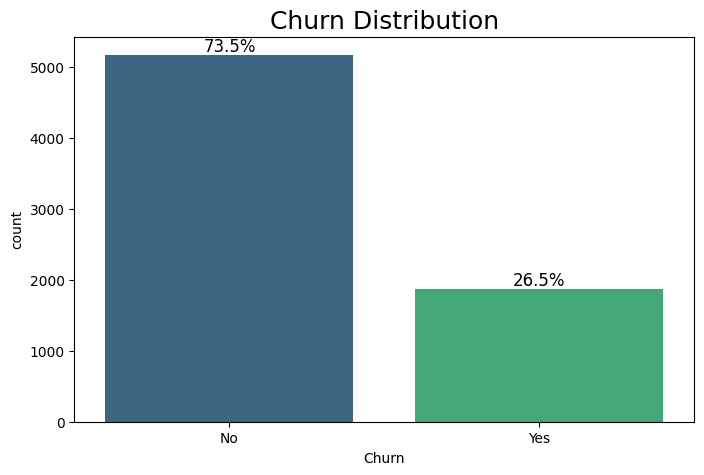

Churn rate: 26.5%


In [326]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Churn Distribution', fontsize=18)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / len(df):.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=12)
plt.show()

print(f"Churn rate: {df['Churn'].value_counts(normalize=True)['Yes']*100:.1f}%")

**Numerical Feature Distributions**

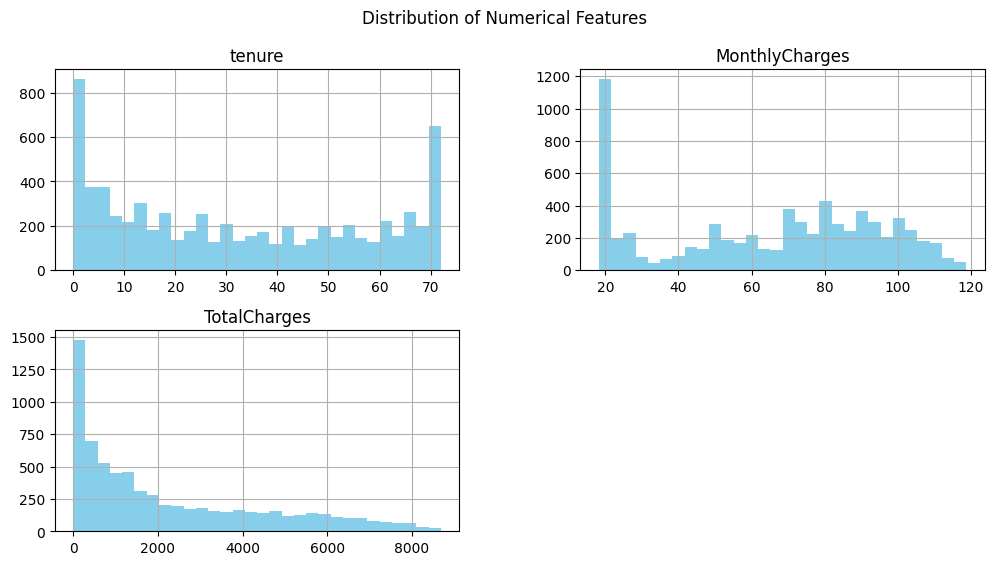

In [327]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[numerical_cols].hist(figsize=(12, 6), bins=30, color='skyblue')
plt.suptitle("Distribution of Numerical Features")
plt.show()


**Numerical Features vs Churn - Boxplots**

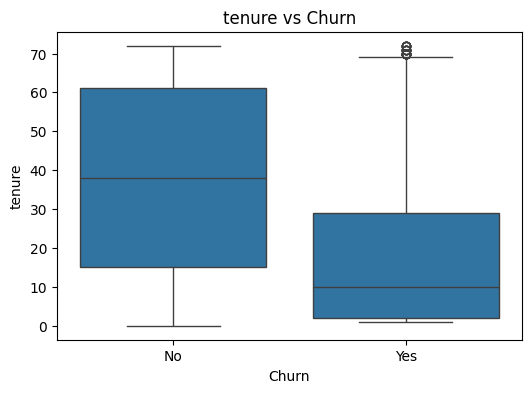

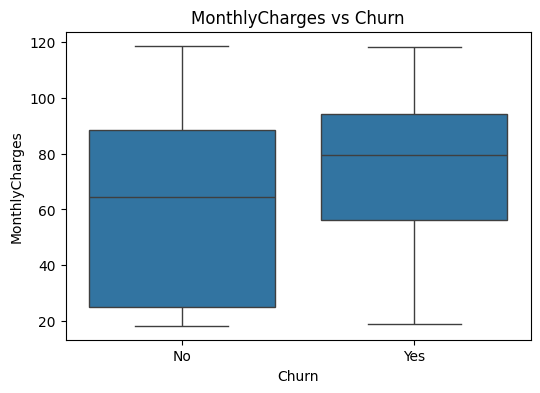

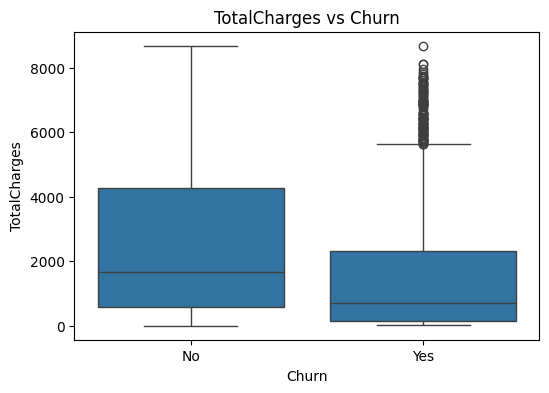

In [328]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()


**Categorical Features vs Churn (Barplots)**

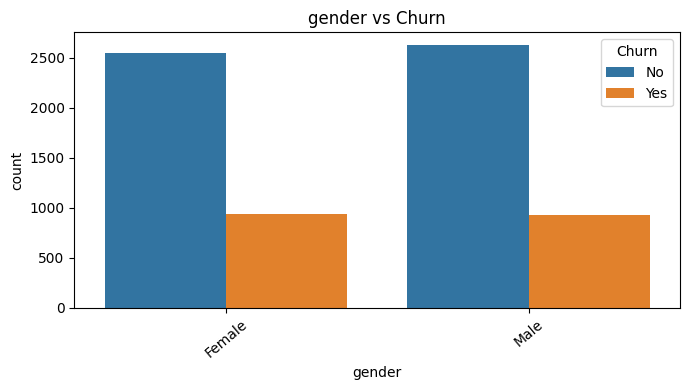

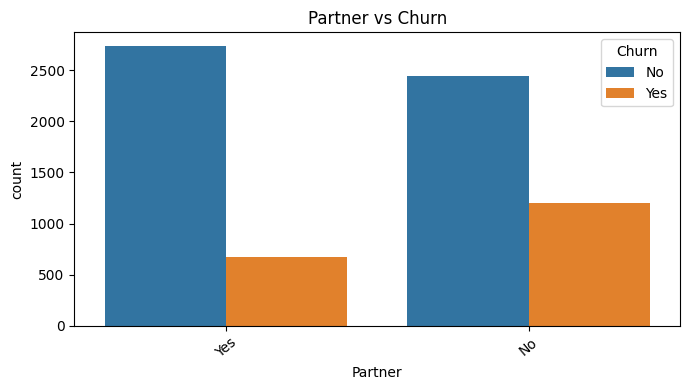

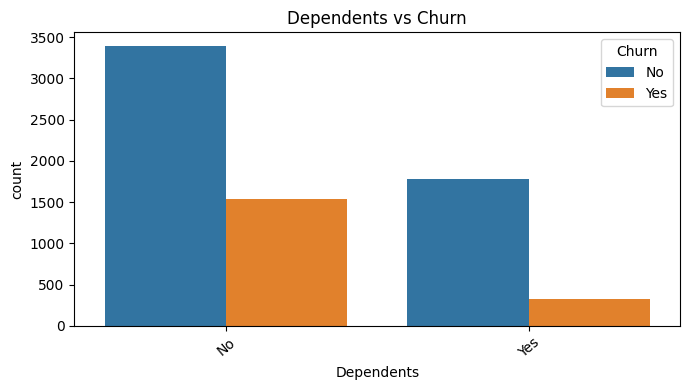

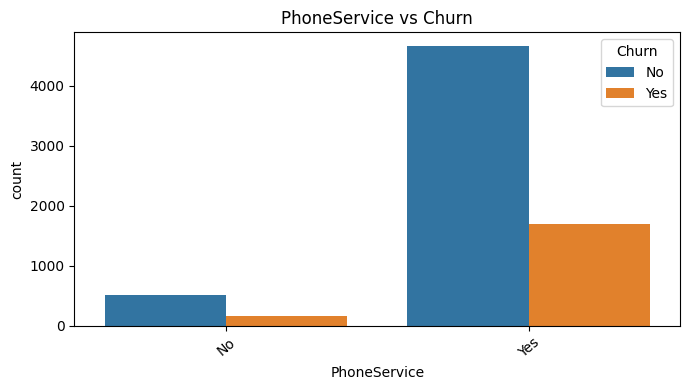

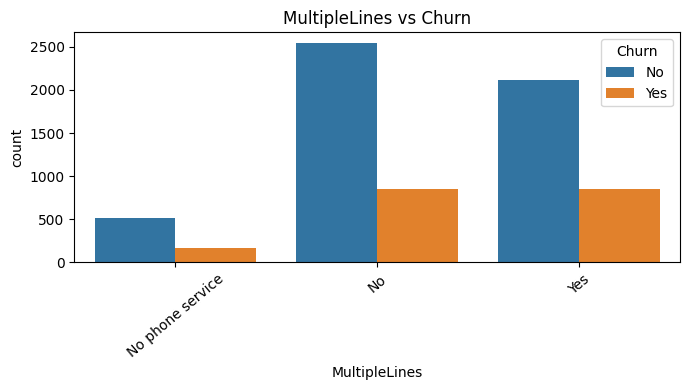

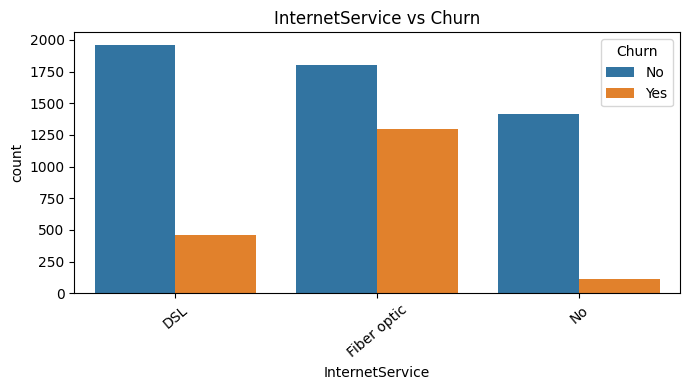

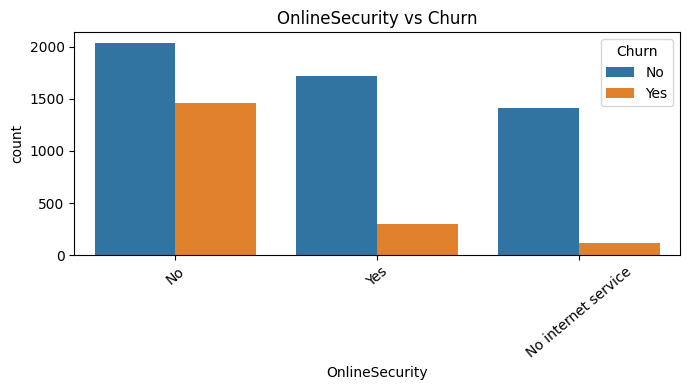

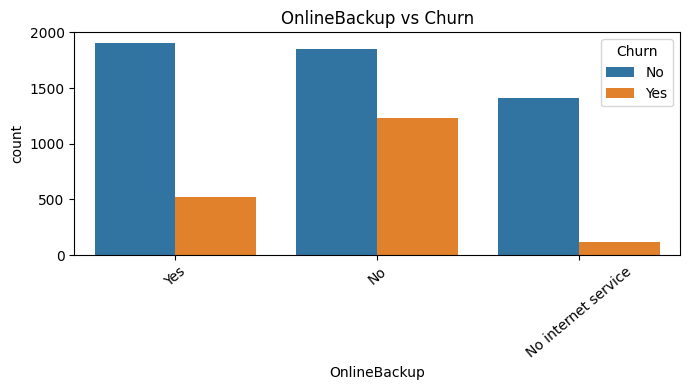

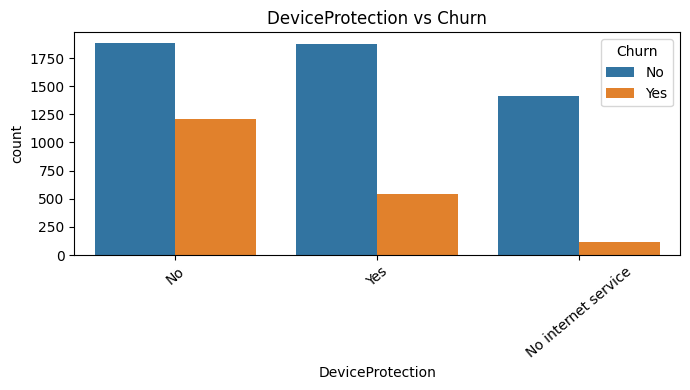

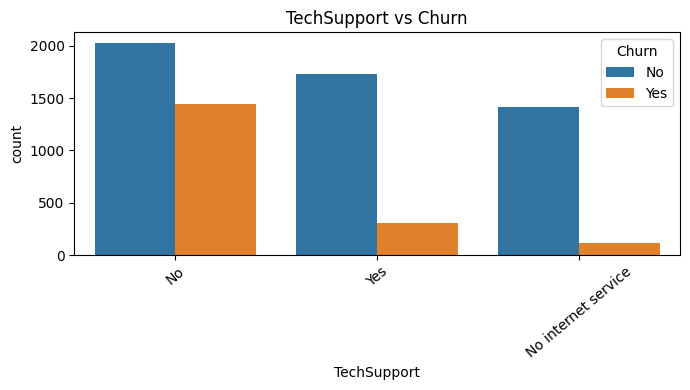

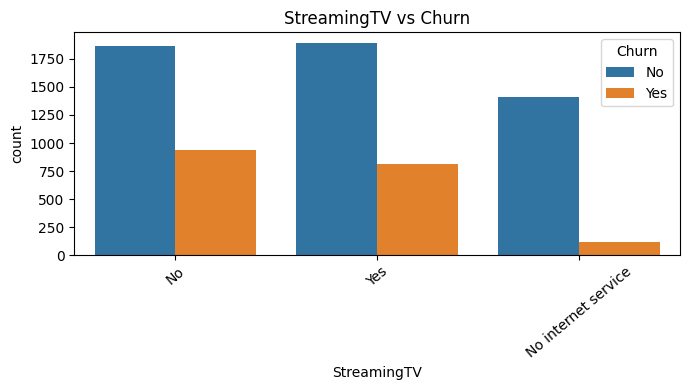

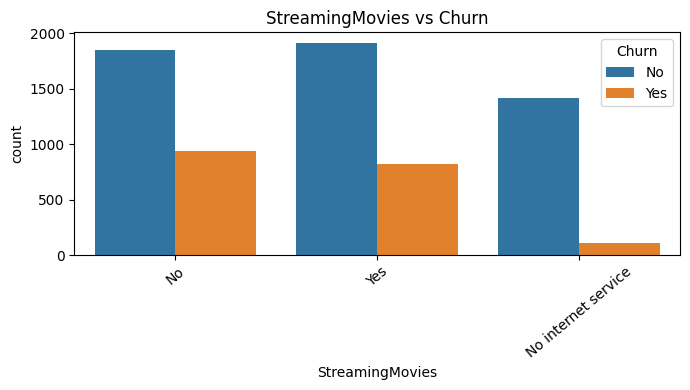

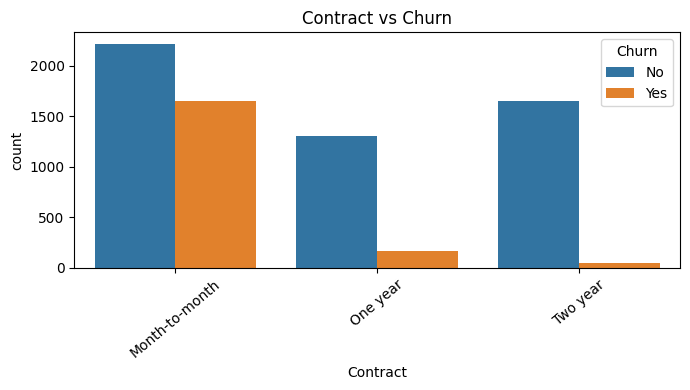

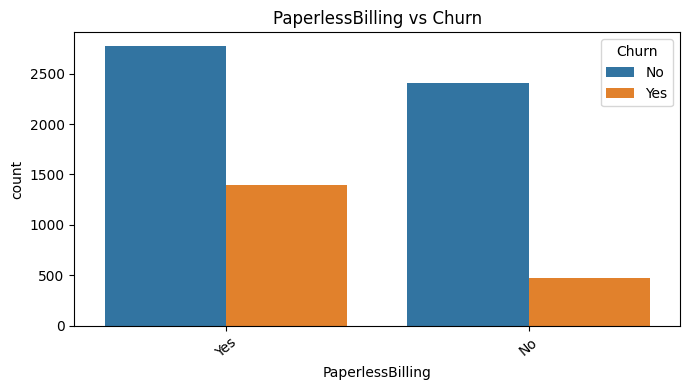

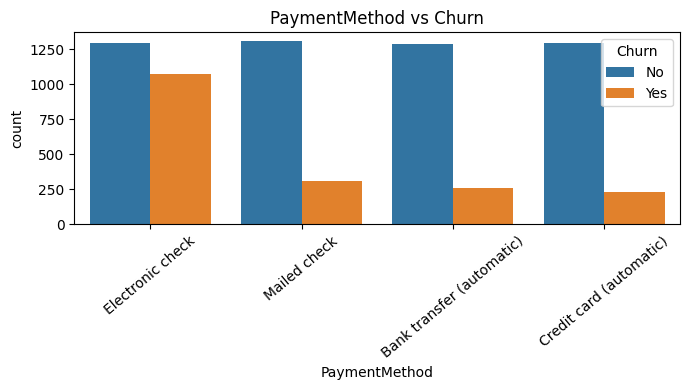

In [329]:
# categorical_cols = df.select_dtypes(include='object').columns.tolist()
# categorical_cols.remove('customerID')

# for col in categorical_cols:
#     plt.figure(figsize=(7,4))
#     sns.countplot(x=col, hue='Churn', data=df)
#     plt.xticks(rotation=40)
#     plt.title(f"{col} vs Churn")
#     plt.tight_layout()
#     plt.show()


categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Remove ID column
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')

# Remove target column
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

for col in categorical_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.xticks(rotation=40)
    plt.title(f"{col} vs Churn")
    plt.tight_layout()
    plt.show()



**Correlation Heatmap - numerical**

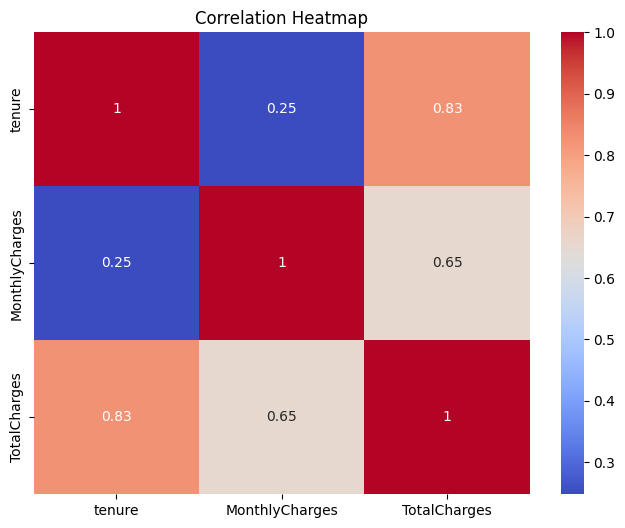

In [330]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


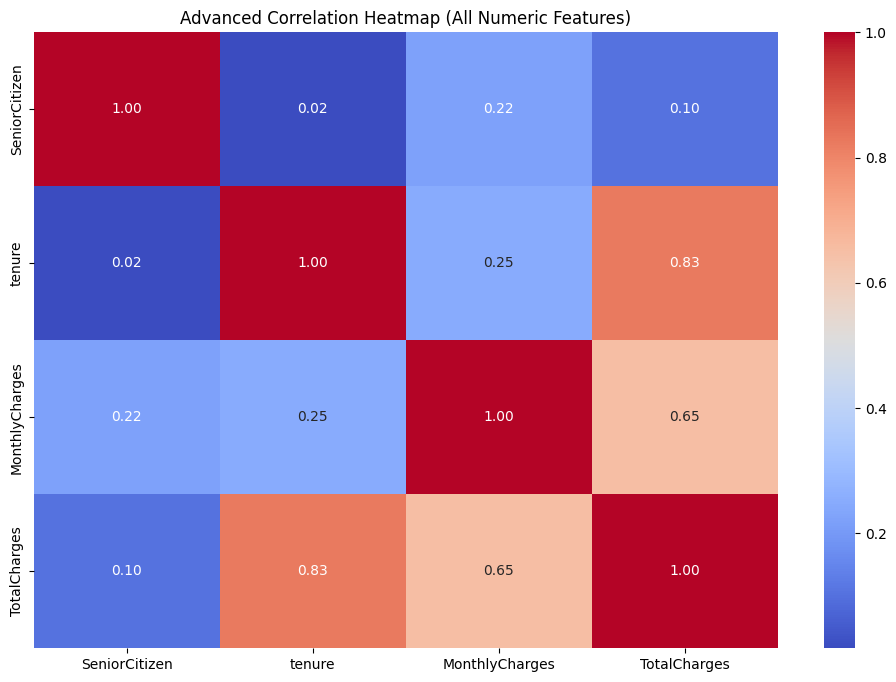

Churn not encoded yet — correlations with target will appear after preprocessing.


In [331]:
# Compute correlation across all numerical features (including churn if encoded later)
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Advanced Correlation Heatmap (All Numeric Features)")
plt.show()

# Show strongest correlations with Churn
if 'Churn' in corr.columns:
    print("\nTop correlations with Churn:")
    display(corr['Churn'].sort_values(ascending=False).head(10))
else:
    print("Churn not encoded yet — correlations with target will appear after preprocessing.")


**Churn Rate by Contract Type**

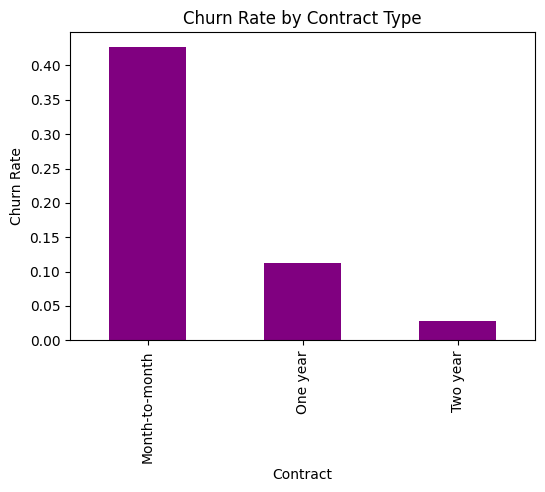

In [332]:
contract_churn = df.groupby("Contract")["Churn"].value_counts(normalize=True).unstack()
contract_churn["Yes"].plot(kind="bar", figsize=(6,4), color="purple")
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.show()


**Tenure binning**

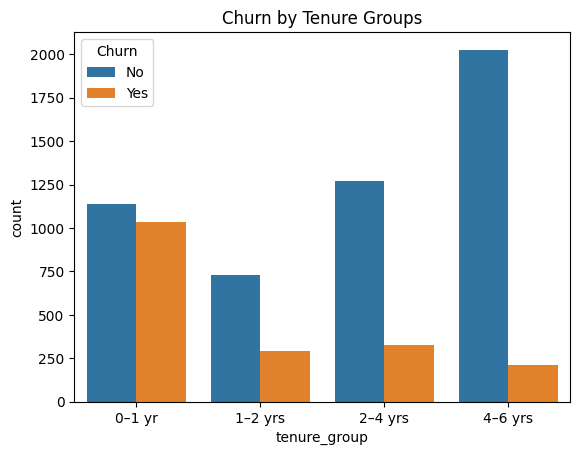

In [333]:
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0–1 yr', '1–2 yrs', '2–4 yrs', '4–6 yrs']
)

sns.countplot(x='tenure_group', hue='Churn', data=df)
plt.title("Churn by Tenure Groups")
plt.show()

**Outlier visualization**

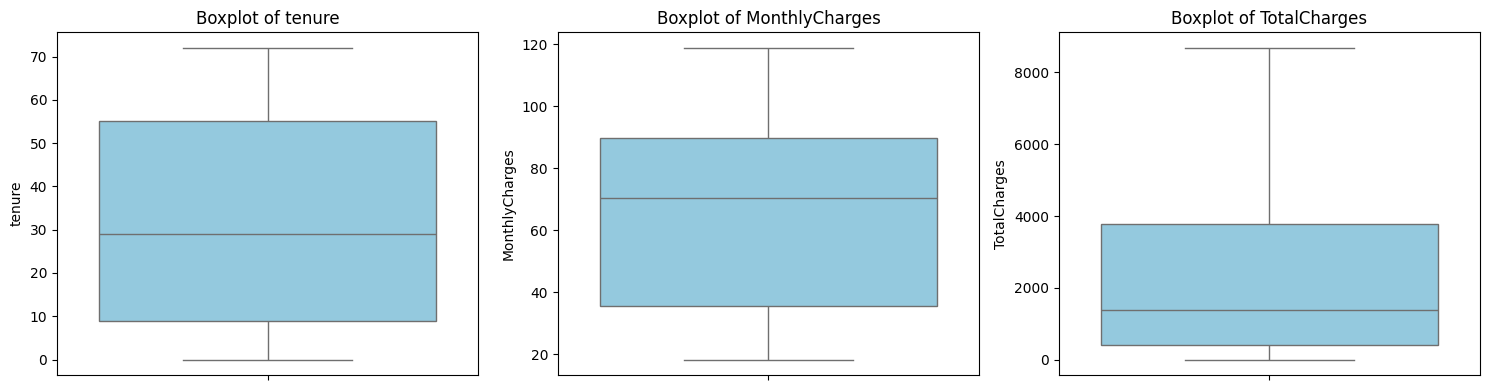

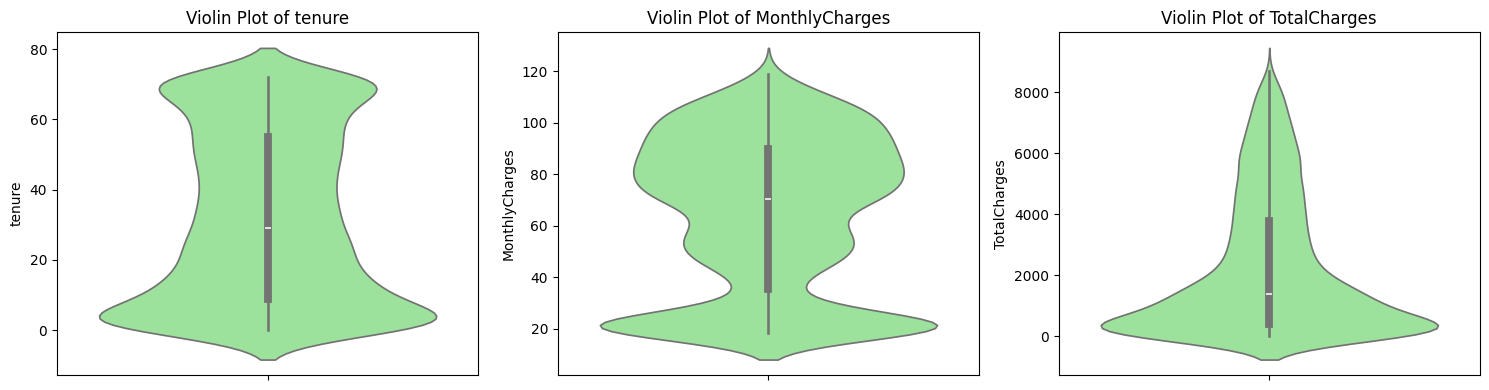

In [334]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Violin plots (optional, more detailed)
plt.figure(figsize=(15, 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(data=df, y=col, color='lightgreen')
    plt.title(f'Violin Plot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
"""**Advanced EDA: Monthly Charges Distribution by Churn (KDE)**
- Visualizes the density of charges for Churned vs Retained customers.
"""
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Churn']=='Yes']['MonthlyCharges'], color='red', fill=True, label='Churned')
sns.kdeplot(df[df['Churn']=='No']['MonthlyCharges'], color='green', fill=True, label='Retained')
plt.title('Distribution of Monthly Charges by Churn Status', fontsize=16)
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:

"""**Advanced EDA: Tenure vs Monthly Charges (Scatter)**
- Identifies clusters of high-risk customers (e.g., New + High Charges).
"""
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', alpha=0.6, palette='coolwarm')
plt.title('Tenure vs Monthly Charges (Colored by Churn)', fontsize=16)
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges')
plt.show()


# 03. Data Pre processing and Feature engineering


- Encoding categorical variables  
- Train–test split  
- One-hot encoding for multi-category features  
- Handling class imbalance using SMOTE  
- Feature scaling (StandardScaler)  
- Preparing the final datasets for model training


In [335]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

**Encode Target Variable - Convert the `Churn` column from categorical (Yes/No) to binary (1/0).**

In [336]:
# Check current distribution
print("Current Churn distribution:")
print(df['Churn'].value_counts())
print("\nPercentage:")
print(df['Churn'].value_counts(normalize=True) * 100)

# Encode Churn: Yes=1, No=0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Verify encoding
print("\nAfter encoding:")
print(df['Churn'].value_counts())
print(f"\nChurn rate: {df['Churn'].mean()*100:.2f}%")


Current Churn distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Percentage:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

After encoding:
Churn
0    5174
1    1869
Name: count, dtype: int64

Churn rate: 26.54%


**Encode Binary Categorical Featuree**


In [337]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

print("Encoding binary columns:")
for col in binary_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

# Encode binary columns
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

print("\n\nAfter encoding:")
for col in binary_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

Encoding binary columns:

Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

PaperlessBilling:
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


After encoding:

Partner:
Partner
0    3641
1    3402
Name: count, dtype: int64

Dependents:
Dependents
0    4933
1    2110
Name: count, dtype: int64

PhoneService:
PhoneService
1    6361
0     682
Name: count, dtype: int64

PaperlessBilling:
PaperlessBilling
1    4171
0    2872
Name: count, dtype: int64


**Handle 'No internet service' and 'No phone service' Values**


In [338]:
# Columns with 'No internet service'
internet_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Replace 'No internet service' with 'No'
for col in internet_cols:
    df[col] = df[col].replace('No internet service', 'No')
    print(f"{col}: {df[col].unique()}")

# Handle MultipleLines 'No phone service'
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
print(f"\nMultipleLines: {df['MultipleLines'].unique()}")


OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']

MultipleLines: ['No' 'Yes']


**Encode Remaining Binary Features**

In [339]:
# These columns are now binary (Yes/No)
binary_service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

print("Encoding service-related binary columns:")
for col in binary_service_cols:
    print(f"\n{col} before: {df[col].unique()}")
    df[col] = df[col].map({'Yes': 1, 'No': 0})
    print(f"{col} after: {df[col].unique()}")


Encoding service-related binary columns:

OnlineSecurity before: ['No' 'Yes']
OnlineSecurity after: [0 1]

OnlineBackup before: ['Yes' 'No']
OnlineBackup after: [1 0]

DeviceProtection before: ['No' 'Yes']
DeviceProtection after: [0 1]

TechSupport before: ['No' 'Yes']
TechSupport after: [0 1]

StreamingTV before: ['No' 'Yes']
StreamingTV after: [0 1]

StreamingMovies before: ['No' 'Yes']
StreamingMovies after: [0 1]

MultipleLines before: ['No' 'Yes']
MultipleLines after: [0 1]


**Encode SeniorCitizen**

In [340]:
# Check SeniorCitizen
print("SeniorCitizen unique values:", df['SeniorCitizen'].unique())
print("SeniorCitizen value counts:")
print(df['SeniorCitizen'].value_counts())
# Already 0/1, no change needed


SeniorCitizen unique values: [0 1]
SeniorCitizen value counts:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


**Encode Gender**

In [341]:
print("Gender distribution before encoding:")
print(df['gender'].value_counts())

# Encode gender: Male=1, Female=0
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

print("\nGender distribution after encoding:")
print(df['gender'].value_counts())

Gender distribution before encoding:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Gender distribution after encoding:
gender
1    3555
0    3488
Name: count, dtype: int64


**Summary of Preprocessed Data**

In [342]:
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nFirst few rows:")
display(df.head())

# Check for any remaining missing values
print("\nMissing values:")
print(df.isnull().sum().sum())

# Identify remaining categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nRemaining categorical columns: {categorical_cols}")


Dataset shape: (7043, 21)

Data types:
gender                 int64
SeniorCitizen          int64
Partner                int64
Dependents             int64
tenure                 int64
PhoneService           int64
MultipleLines          int64
InternetService       object
OnlineSecurity         int64
OnlineBackup           int64
DeviceProtection       int64
TechSupport            int64
StreamingTV            int64
StreamingMovies        int64
Contract              object
PaperlessBilling       int64
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                  int64
tenure_group        category
dtype: object

First few rows:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,0,1,0,1,0,0,DSL,0,1,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0–1 yr
1,1,0,0,0,34,1,0,DSL,1,0,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,2–4 yrs
2,1,0,0,0,2,1,0,DSL,1,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,0–1 yr
3,1,0,0,0,45,0,0,DSL,1,0,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,2–4 yrs
4,0,0,0,0,2,1,0,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0–1 yr



Missing values:
11

Remaining categorical columns: ['InternetService', 'Contract', 'PaymentMethod']


**Train Test Split**


In [343]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nTarget distribution:")
print(y.value_counts(normalize=True))


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# # Make a validation set BEFORE applying SMOTE
# X_train_sub, X_val, y_train_sub, y_val = train_test_split(
#     X_train_tree, y_train,
#     test_size=0.2,
#     random_state=42,
#     stratify=y_train
# )

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("\nTraining set target distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest set target distribution:")
print(y_test.value_counts(normalize=True))

Features shape: (7043, 20)
Target shape: (7043,)

Target distribution:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64
Training set size: (5634, 20)
Test set size: (1409, 20)

Training set target distribution:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Test set target distribution:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


# 04. Feature Engineering

**One Hot Encoding for Multi Category Features**

In [344]:
# Determine categorical columns (excluding tenure_group if present)
categorical_cols = ['InternetService', 'Contract', 'PaymentMethod']

# Drop tenure_group if it exists (redundant and causes issues if not encoded)
if 'tenure_group' in X_train.columns:
    X_train = X_train.drop('tenure_group', axis=1)
    X_test = X_test.drop('tenure_group', axis=1)
    print("Dropped redundant 'tenure_group' column.")


from sklearn.preprocessing import OneHotEncoder
import pandas as pd

#categorical_cols = ['InternetService', 'Contract', 'PaymentMethod']
#'tenure_group'

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit encoder on training data
encoder.fit(X_train[categorical_cols])

# Get feature names
feature_names = encoder.get_feature_names_out(categorical_cols)
print("One-hot encoded feature names:")
print(feature_names)

# Transform training data
X_train_encoded = encoder.transform(X_train[categorical_cols])
X_train_encoded_df = pd.DataFrame(
    X_train_encoded,
    columns=feature_names,
    index=X_train.index
)

# Transform test data
X_test_encoded = encoder.transform(X_test[categorical_cols])
X_test_encoded_df = pd.DataFrame(
    X_test_encoded,
    columns=feature_names,
    index=X_test.index
)

print(f"\nEncoded training data shape: {X_train_encoded_df.shape}")
print(f"Encoded test data shape: {X_test_encoded_df.shape}")

Dropped redundant 'tenure_group' column.
One-hot encoded feature names:
['InternetService_Fiber optic' 'InternetService_No' 'Contract_One year'
 'Contract_Two year' 'PaymentMethod_Credit card (automatic)'
 'PaymentMethod_Electronic check' 'PaymentMethod_Mailed check']

Encoded training data shape: (5634, 7)
Encoded test data shape: (1409, 7)


In [345]:
# Drop original categorical columns and add encoded ones
X_train_processed = X_train.drop(categorical_cols, axis=1)
X_test_processed = X_test.drop(categorical_cols, axis=1)

# Concatenate encoded features
X_train_processed = pd.concat([X_train_processed, X_train_encoded_df], axis=1)
X_test_processed = pd.concat([X_test_processed, X_test_encoded_df], axis=1)

print("Training set shape after encoding:", X_train_processed.shape)
print("Test set shape after encoding:", X_test_processed.shape)
print("\nFinal feature names:")
print(X_train_processed.columns.tolist())

Training set shape after encoding: (5634, 23)
Test set shape after encoding: (1409, 23)

Final feature names:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


**Feature engineering**

In [346]:
# Avg Monthly Charges per Tenure Month
X_train_processed['AvgChargesPerMonth'] = (
    X_train_processed['TotalCharges'] / (X_train_processed['tenure'] + 1e-5)
)
X_test_processed['AvgChargesPerMonth'] = (
    X_test_processed['TotalCharges'] / (X_test_processed['tenure'] + 1e-5)
)

# Service Count - total no of services subscribed
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']

X_train_processed['ServiceCount'] = X_train_processed[service_cols].sum(axis=1)
X_test_processed['ServiceCount'] = X_test_processed[service_cols].sum(axis=1)

# Has Multiple Services (binary)
X_train_processed['HasMultipleServices'] = (X_train_processed['ServiceCount'] > 1).astype(int)
X_test_processed['HasMultipleServices'] = (X_test_processed['ServiceCount'] > 1).astype(int)

print("New features created:")
print("- AvgChargesPerMonth")
print("- ServiceCount")
print("- HasMultipleServices")
print(f"\nTraining set shape (after FE): {X_train_processed.shape}")
print(f"Test set shape (after FE): {X_test_processed.shape}")


New features created:
- AvgChargesPerMonth
- ServiceCount
- HasMultipleServices

Training set shape (after FE): (5634, 26)
Test set shape (after FE): (1409, 26)


**Scaling the according for the DT model and the NN model**

In [347]:

#DT model data - unscaled
X_train_tree = X_train_processed.copy()
X_test_tree = X_test_processed.copy()

print(f"Tree Data (Unscaled) Ready. Shape: {X_train_tree.shape}")

#NN model data - scaled

# Fit scaler to the training set
scaler = StandardScaler()
scaler.fit(X_train_processed[numerical_cols])

# Create copies for NN
X_train_nn = X_train_processed.copy()
X_test_nn = X_test_processed.copy()

# Apply scaling to NN only
X_train_nn[numerical_cols] = scaler.transform(X_train_nn[numerical_cols])
X_test_nn[numerical_cols]  = scaler.transform(X_test_nn[numerical_cols])

# Convert to float32 for TensorFlow
X_train_nn = X_train_nn.astype('float32')
X_test_nn  = X_test_nn.astype('float32')

y_train_nn = y_train.copy()
y_test_nn  = y_test.copy()

print("NN Data (Scaled) Ready. Shape:", X_train_nn.shape)



Tree Data (Unscaled) Ready. Shape: (5634, 26)
NN Data (Scaled) Ready. Shape: (5634, 26)


**Feature scaling**

**SAVING**

In [348]:
# Optional: Save preprocessed data
# X_train_processed.to_csv('X_train_processed.csv', index=False)
# X_test_processed.to_csv('X_test_processed.csv', index=False)
# y_train.to_csv('y_train.csv', index=False)
# y_test.to_csv('y_test.csv', index=False)

# print("Preprocessing and Feature Engineering Complete! ✅")
# print("\nYou can now proceed to model building with:")
# print("- X_train_processed")
# print("- X_test_processed")
# print("- y_train")
# print("- y_test")

# 05. Decision Tree Model

In [349]:
from sklearn.tree import DecisionTreeClassifier, plot_tree # Added plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Added this import
import warnings
warnings.filterwarnings('ignore')

**Baseline DT model with default parameters.
"""**

In [350]:
baseline_dt = DecisionTreeClassifier(
    class_weight='balanced',
    random_state=42
)

baseline_dt.fit(X_train_tree, y_train)




DecisionTreeClassifier(class_weight='balanced', random_state=42)

**Evaluating Baseline DT model**


BASELINE DT RESULTS
AUC: 0.676318168901289
Recall: 0.5240641711229946
Precision: 0.5226666666666666
F1 Score: 0.5233644859813084
Confusion Matrix:
 [[856 179]
 [178 196]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1035
           1       0.52      0.52      0.52       374

    accuracy                           0.75      1409
   macro avg       0.68      0.68      0.68      1409
weighted avg       0.75      0.75      0.75      1409



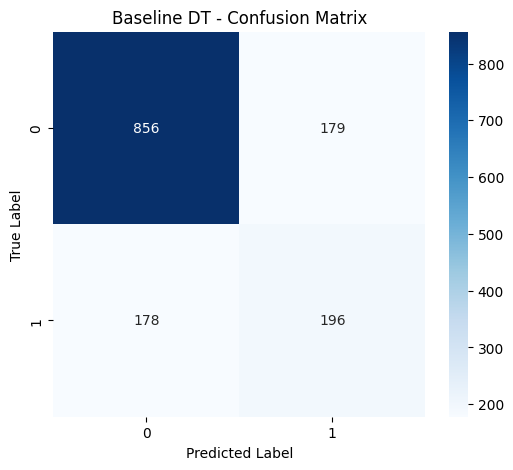


Overfitting Check:
Train Accuracy: 0.9979
Test Accuracy:  0.7466


In [351]:
# Predictions
dt_base_prob = baseline_dt.predict_proba(X_test_tree)[:, 1]
dt_base_class = baseline_dt.predict(X_test_tree)

# Evaluation
dt_base_auc = roc_auc_score(y_test, dt_base_prob)
dt_base_recall = recall_score(y_test, dt_base_class)
dt_base_precision = precision_score(y_test, dt_base_class)
dt_base_f1 = f1_score(y_test, dt_base_class)
dt_base_accuracy = accuracy_score(y_test, dt_base_class)

print("\nBASELINE DT RESULTS")
print("AUC:", dt_base_auc)
print("Recall:", dt_base_recall)
print("Precision:", dt_base_precision)
print("F1 Score:", dt_base_f1)

print("Confusion Matrix:\n", confusion_matrix(y_test, dt_base_class))
print("Classification Report:\n", classification_report(y_test, dt_base_class))


import seaborn as sns
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, dt_base_class), annot=True, fmt='d', cmap='Blues')
plt.title("Baseline DT - Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Check for Overfitting
train_acc = baseline_dt.score(X_train_tree, y_train)
test_acc = accuracy_score(y_test, dt_base_class)
print(f"\nOverfitting Check:")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")
if train_acc - test_acc > 0.1:
    print("WARNING: Model is showing signs of OVERFITTING (Train >> Test)")
else:
    print("Model generalization looks reasonable.")

**Hyperparameter Tuning - GridSearchCV to find optimal hyperparameters**

In [352]:
print("\n" + "="*70)
print("              HYPERPARAMETER TUNING (PRE-PRUNING)")
print("="*70)

# param_grid_dt = {
#     "max_depth": list(range(3, 12)),
#     "min_samples_split": [10, 20, 50, 100],
#     "min_samples_leaf": [5, 10, 20, 30]
# }

param_grid_dt = {
    "max_depth": list(range(3, 15)),
    "min_samples_split": [10, 20, 50, 100],
    "min_samples_leaf": [5, 10, 20, 30],
    "criterion": ["gini", "entropy"],
    "ccp_alpha": [0.0, 0.001, 0.005, 0.01, 0.015, 0.02]
}


grid_dt = GridSearchCV(
    DecisionTreeClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid_dt,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)

grid_dt.fit(X_train_tree, y_train)

best_dt = grid_dt.best_estimator_

print("\nBest Hyperparameters Found:")
print(grid_dt.best_params_)



              HYPERPARAMETER TUNING (PRE-PRUNING)

Best Hyperparameters Found:
{'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 30, 'min_samples_split': 100}


**Train optimal DT**

In [353]:
# print("\n" + "="*70)
# print("               OPTIMAL DECISION TREE MODEL")
# print("="*70)

# dt_optimal = best_dt
# dt_optimal.fit(X_train_tree, y_train)

# # Predictions
# # Predictions
# y_test_proba_dt = dt_optimal.predict_proba(X_test_tree)[:, 1]

# # --- THRESHOLD TUNING (STRICT ML RULE: Tune on TRAIN, Apply to TEST) ---
# # Get probabilities on TRAINING set to find best threshold
# y_train_proba_dt = dt_optimal.predict_proba(X_train_tree)[:, 1]

# thresholds = np.arange(0.1, 0.9, 0.01)
# best_f1_dt = 0
# best_thresh_dt = 0.5

# for t in thresholds:
#     # Evaluate on TRAIN set
#     preds_train = (y_train_proba_dt >= t).astype(int)
#     f1 = f1_score(y_train, preds_train)
#     if f1 > best_f1_dt:
#         best_f1_dt = f1
#         best_thresh_dt = t

# print(f"\n[OPTIMIZATION] Best Threshold found on Training Data: {best_thresh_dt:.2f}")
# print(f"[OPTIMIZATION] F1-Score on Training Data: {best_f1_dt:.4f}")

# # Apply found threshold to TEST set
# y_test_pred_dt = (y_test_proba_dt >= best_thresh_dt).astype(int)
# # -----------------------------------------------------------------------

# print("\nOptimal model successfully trained!")
# print(f" → Tree Depth: {dt_optimal.get_depth()}")
# print(f" → Number of Leaves: {dt_optimal.get_n_leaves()}")




"""**Train optimal DT**"""

print("\n" + "="*70)
print("               OPTIMAL DECISION TREE MODEL")
print("="*70)

dt_optimal = best_dt
dt_optimal.fit(X_train_tree, y_train)

# Predictions
# Predictions
y_test_proba_dt = dt_optimal.predict_proba(X_test_tree)[:, 1]

# --- THRESHOLD TUNING (STRICT ML RULE: Tune on TRAIN, Apply to TEST) ---
# Get probabilities on TRAINING set to find best threshold
y_train_proba_dt = dt_optimal.predict_proba(X_train_tree)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.01)
best_f1_dt = 0
best_thresh_dt = 0.5

for t in thresholds:
    # Evaluate on TRAIN set
    preds_train = (y_train_proba_dt >= t).astype(int)
    f1 = f1_score(y_train, preds_train)
    if f1 > best_f1_dt:
        best_f1_dt = f1
        best_thresh_dt = t

print(f"\n[OPTIMIZATION] Best Threshold found on Training Data: {best_thresh_dt:.2f}")
print(f"[OPTIMIZATION] F1-Score on Training Data: {best_f1_dt:.4f}")

# Apply found threshold to TEST set
y_test_pred_dt = (y_test_proba_dt >= best_thresh_dt).astype(int)
# -----------------------------------------------------------------------

print("\nOptimal model successfully trained!")
print(f" → Tree Depth: {dt_optimal.get_depth()}")
print(f" → Number of Leaves: {dt_optimal.get_n_leaves()}")



               OPTIMAL DECISION TREE MODEL

[OPTIMIZATION] Best Threshold found on Training Data: 0.55
[OPTIMIZATION] F1-Score on Training Data: 0.6541

Optimal model successfully trained!
 → Tree Depth: 7
 → Number of Leaves: 51


**Evaluate Optimal Decision Tree Model**


------------------------------------------------------------
       EVALUATION OF OPTIMAL DECISION TREE
------------------------------------------------------------
AUC:        0.8325
Recall:     0.7219
Precision:  0.5389
F1 Score:   0.6171

Confusion Matrix:
[[804 231]
 [104 270]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1035
           1       0.54      0.72      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409



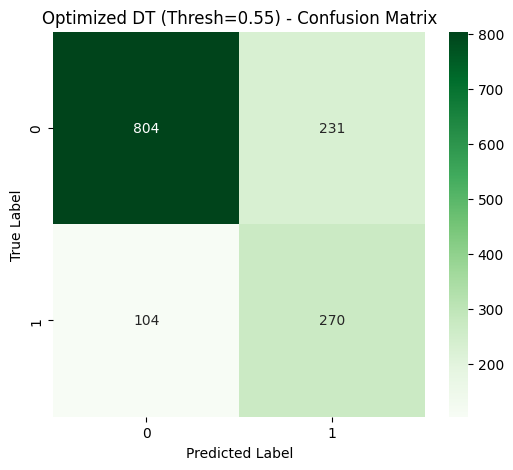


Overfitting Check (Optimized):
Train Accuracy: 0.7595
Test Accuracy:  0.7622
Model generalization looks reasonable.

     BASELINE vs OPTIMIZED COMPARISON
Metric          Baseline        Optimized      
---------------------------------------------
AUC             0.6763          0.8325
F1-Score        0.5234           0.6171
Recall          0.5241           0.7219
Precision       0.5227        0.5389
---------------------------------------------


In [354]:
# dt_auc = roc_auc_score(y_test, y_test_proba_dt)
# dt_recall = recall_score(y_test, y_test_pred_dt)
# dt_precision = precision_score(y_test, y_test_pred_dt)
# dt_f1 = f1_score(y_test, y_test_pred_dt)

# print("\n" + "-"*60)
# print("       EVALUATION OF OPTIMAL DECISION TREE")
# print("-"*60)

# print(f"AUC:        {dt_auc:.4f}")
# print(f"Recall:     {dt_recall:.4f}")
# print(f"Precision:  {dt_precision:.4f}")
# print(f"F1 Score:   {dt_f1:.4f}")

# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_test_pred_dt))

# print("\nClassification Report:")
# print(classification_report(y_test, y_test_pred_dt))




# # plt.figure(figsize=(6,5))
# # sns.heatmap(confusion_matrix(y_test, y_test_pred_dt), annot=True, fmt='d', cmap='Greens')
# # plt.title("Optimized DT - Confusion Matrix")
# # plt.ylabel('True Label')
# # plt.xlabel('Predicted Label')
# # plt.show()


# plt.figure(figsize=(6,5))
# sns.heatmap(confusion_matrix(y_test, y_test_pred_dt), annot=True, fmt='d', cmap='Greens')
# plt.title(f"Optimized DT (Thresh={best_thresh_dt:.2f}) - Confusion Matrix")
# plt.ylabel('True Label')
# plt.xlabel('Predicted Label')
# plt.show()

# # Check for Overfitting (Optimized)
# train_acc_opt = dt_optimal.score(X_train_tree, y_train)
# test_acc_opt = accuracy_score(y_test, y_test_pred_dt)
# print(f"\nOverfitting Check (Optimized):")
# print(f"Train Accuracy: {train_acc_opt:.4f}")
# print(f"Test Accuracy:  {test_acc_opt:.4f}")
# if train_acc_opt - test_acc_opt > 0.1:
#     print("WARNING: Model is showing signs of OVERFITTING")
# else:
#     print("Model generalization looks reasonable.")

# # Comparison Baseline vs Optimized
# print("\n" + "="*50)
# print("     BASELINE vs OPTIMIZED COMPARISON")
# print("="*50)
# print(f"{'Metric':<15} {'Baseline':<15} {'Optimized':<15}")
# print("-" * 45)
# print(f"{'AUC':<15} {dt_base_auc:.4f}          {dt_auc:.4f}")
# print(f"{'F1-Score':<15} {dt_base_f1:.4f}           {dt_f1:.4f}")
# print(f"{'Recall':<15} {dt_base_recall:.4f}           {dt_recall:.4f}")
# print(f"{'Precision':<15} {dt_base_precision:.4f}        {dt_precision:.4f}")
# print("-" * 45)




dt_auc = roc_auc_score(y_test, y_test_proba_dt)
dt_recall = recall_score(y_test, y_test_pred_dt)
dt_precision = precision_score(y_test, y_test_pred_dt)
dt_f1 = f1_score(y_test, y_test_pred_dt)

print("\n" + "-"*60)
print("       EVALUATION OF OPTIMAL DECISION TREE")
print("-"*60)

print(f"AUC:        {dt_auc:.4f}")
print(f"Recall:     {dt_recall:.4f}")
print(f"Precision:  {dt_precision:.4f}")
print(f"F1 Score:   {dt_f1:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_dt))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_dt))




plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_test_pred_dt), annot=True, fmt='d', cmap='Greens')
plt.title(f"Optimized DT (Thresh={best_thresh_dt:.2f}) - Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Check for Overfitting (Optimized)
train_acc_opt = dt_optimal.score(X_train_tree, y_train)
test_acc_opt = accuracy_score(y_test, y_test_pred_dt)
print(f"\nOverfitting Check (Optimized):")
print(f"Train Accuracy: {train_acc_opt:.4f}")
print(f"Test Accuracy:  {test_acc_opt:.4f}")
if train_acc_opt - test_acc_opt > 0.1:
    print("WARNING: Model is showing signs of OVERFITTING")
else:
    print("Model generalization looks reasonable.")

# Comparison Baseline vs Optimized
print("\n" + "="*50)
print("     BASELINE vs OPTIMIZED COMPARISON")
print("="*50)
print(f"{'Metric':<15} {'Baseline':<15} {'Optimized':<15}")
print("-" * 45)
print(f"{'AUC':<15} {dt_base_auc:.4f}          {dt_auc:.4f}")
print(f"{'F1-Score':<15} {dt_base_f1:.4f}           {dt_f1:.4f}")
print(f"{'Recall':<15} {dt_base_recall:.4f}           {dt_recall:.4f}")
print(f"{'Precision':<15} {dt_base_precision:.4f}        {dt_precision:.4f}")
print("-" * 45)



TRAIN VS TEST PERFORMANCE ANALYSIS


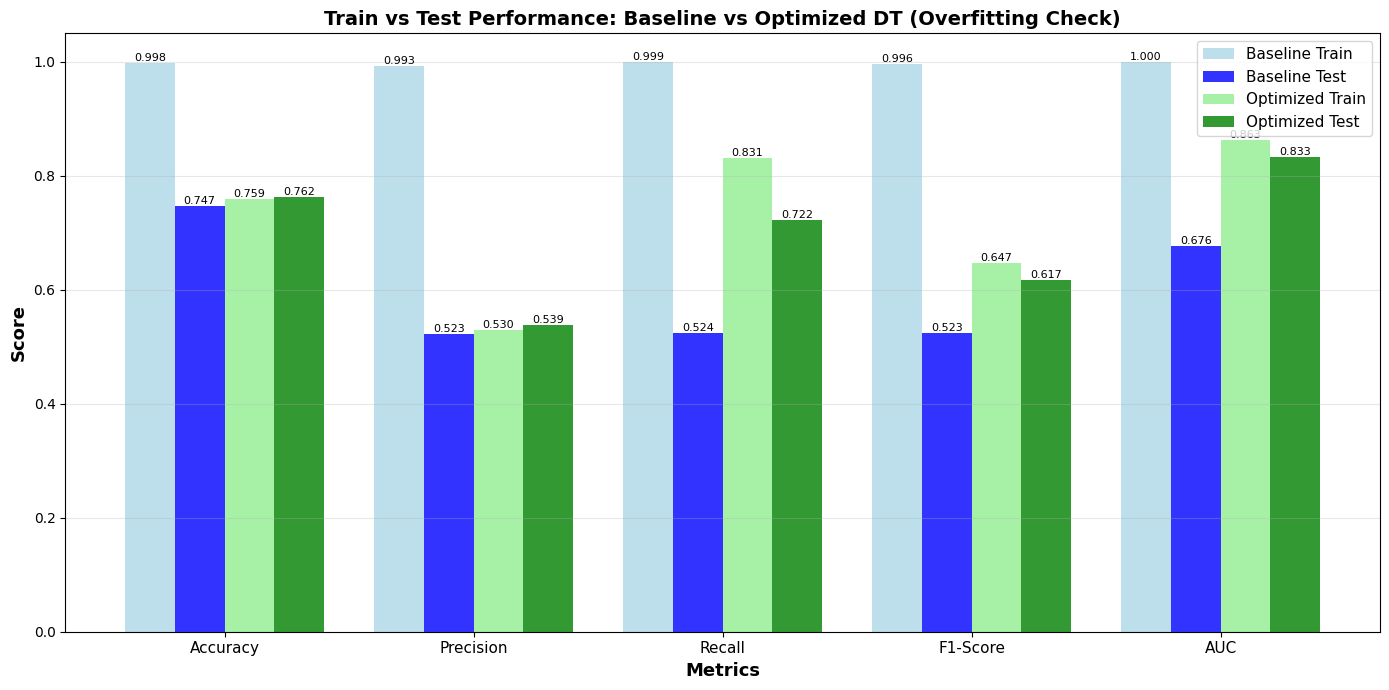


Overfitting Analysis:
Baseline - Train AUC: 1.0000, Test AUC: 0.6763, Gap: 0.3237
Optimized - Train AUC: 0.8634, Test AUC: 0.8325, Gap: 0.0309
Optimization reduced overfitting!


In [355]:

# 1. TRAIN VS TEST PERFORMANCE COMPARISON (Overfitting Detection)
print("\n" + "="*70)
print("TRAIN VS TEST PERFORMANCE ANALYSIS")
print("="*70)

# Calculate training metrics for both models
baseline_train_pred = baseline_dt.predict(X_train_tree)
baseline_train_proba = baseline_dt.predict_proba(X_train_tree)[:, 1]

optimized_train_pred = dt_optimal.predict(X_train_tree)
optimized_train_proba = dt_optimal.predict_proba(X_train_tree)[:, 1]

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']

baseline_train_scores = [
    accuracy_score(y_train, baseline_train_pred),
    precision_score(y_train, baseline_train_pred),
    recall_score(y_train, baseline_train_pred),
    f1_score(y_train, baseline_train_pred),
    roc_auc_score(y_train, baseline_train_proba)
]

baseline_test_scores = [
    dt_base_accuracy,
    dt_base_precision,
    dt_base_recall,
    dt_base_f1,
    dt_base_auc
]

optimized_train_scores = [
    accuracy_score(y_train, optimized_train_pred),
    precision_score(y_train, optimized_train_pred),
    recall_score(y_train, optimized_train_pred),
    f1_score(y_train, optimized_train_pred),
    roc_auc_score(y_train, optimized_train_proba)
]

optimized_test_scores = [
    test_acc_opt,
    dt_precision,
    dt_recall,
    dt_f1,
    dt_auc
]

# Visualization
x = np.arange(len(metrics_names))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 7))
bars1 = ax.bar(x - 1.5*width, baseline_train_scores, width, label='Baseline Train', color='lightblue', alpha=0.8)
bars2 = ax.bar(x - 0.5*width, baseline_test_scores, width, label='Baseline Test', color='blue', alpha=0.8)
bars3 = ax.bar(x + 0.5*width, optimized_train_scores, width, label='Optimized Train', color='lightgreen', alpha=0.8)
bars4 = ax.bar(x + 1.5*width, optimized_test_scores, width, label='Optimized Test', color='green', alpha=0.8)

ax.set_xlabel('Metrics', fontsize=13, fontweight='bold')
ax.set_ylabel('Score', fontsize=13, fontweight='bold')
ax.set_title('Train vs Test Performance: Baseline vs Optimized DT (Overfitting Check)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names, fontsize=11)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1.05])

# Add value labels
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Print overfitting analysis
print("\nOverfitting Analysis:")
print(f"Baseline - Train AUC: {baseline_train_scores[4]:.4f}, Test AUC: {baseline_test_scores[4]:.4f}, Gap: {(baseline_train_scores[4] - baseline_test_scores[4]):.4f}")
print(f"Optimized - Train AUC: {optimized_train_scores[4]:.4f}, Test AUC: {optimized_test_scores[4]:.4f}, Gap: {(optimized_train_scores[4] - optimized_test_scores[4]):.4f}")

if (optimized_train_scores[4] - optimized_test_scores[4]) < (baseline_train_scores[4] - baseline_test_scores[4]):
    print("Optimization reduced overfitting!")
else:
    print("Overfitting gap increased slightly")



TREE COMPLEXITY ANALYSIS
    Metric  Baseline  Optimized
 Max Depth        26          7
Num Leaves      1206         51
 Num Nodes      2411        101


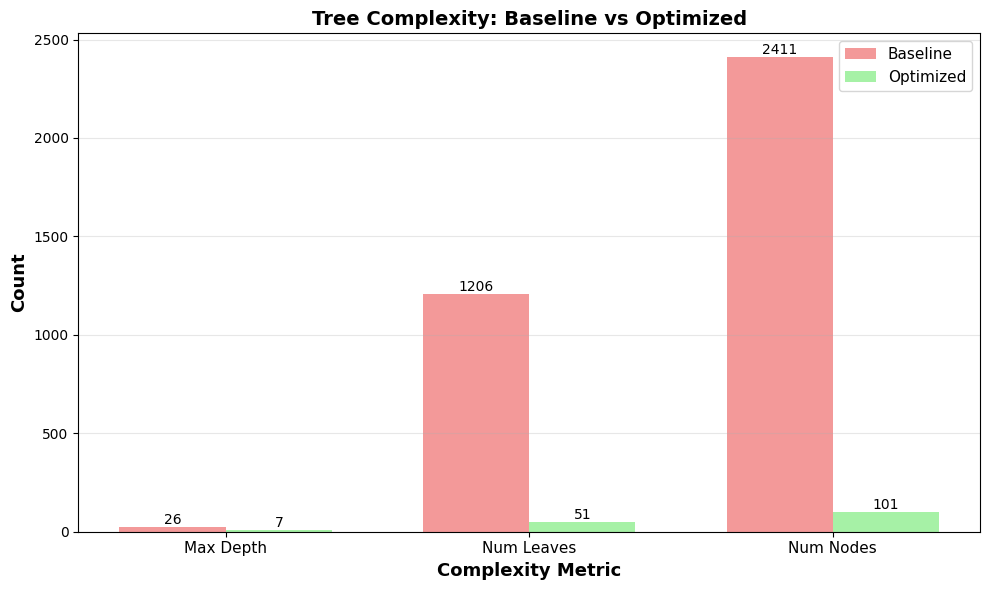


Complexity Reduction:
  Depth reduced by: 19 levels
  Leaves reduced by: 1155 nodes
  Total nodes reduced by: 2310 nodes


In [356]:

# 2. TREE COMPLEXITY COMPARISON
print("\n" + "="*70)
print("TREE COMPLEXITY ANALYSIS")
print("="*70)

complexity_data = {
    'Metric': ['Max Depth', 'Num Leaves', 'Num Nodes'],
    'Baseline': [baseline_dt.get_depth(), baseline_dt.get_n_leaves(), baseline_dt.tree_.node_count],
    'Optimized': [dt_optimal.get_depth(), dt_optimal.get_n_leaves(), dt_optimal.tree_.node_count]
}

df_complexity = pd.DataFrame(complexity_data)
print(df_complexity.to_string(index=False))

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(complexity_data['Metric']))
width = 0.35

bars1 = ax.bar(x - width/2, complexity_data['Baseline'], width, label='Baseline', color='lightcoral', alpha=0.8)
bars2 = ax.bar(x + width/2, complexity_data['Optimized'], width, label='Optimized', color='lightgreen', alpha=0.8)

ax.set_xlabel('Complexity Metric', fontsize=13, fontweight='bold')
ax.set_ylabel('Count', fontsize=13, fontweight='bold')
ax.set_title('Tree Complexity: Baseline vs Optimized', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(complexity_data['Metric'], fontsize=11)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nComplexity Reduction:")
print(f"  Depth reduced by: {baseline_dt.get_depth() - dt_optimal.get_depth()} levels")
print(f"  Leaves reduced by: {baseline_dt.get_n_leaves() - dt_optimal.get_n_leaves()} nodes")
print(f"  Total nodes reduced by: {baseline_dt.tree_.node_count - dt_optimal.tree_.node_count} nodes")



LEARNING CURVE ANALYSIS


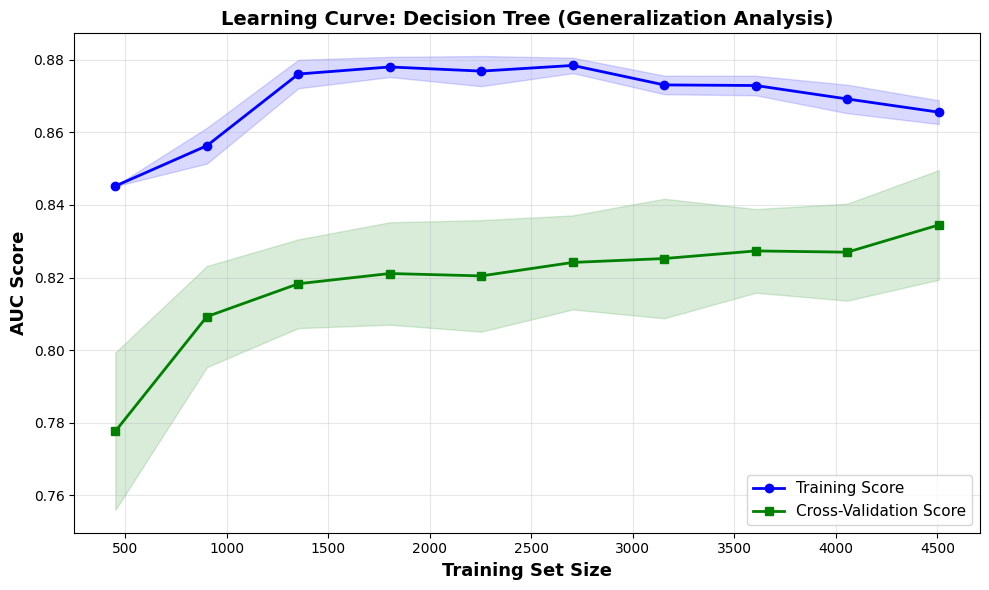

Final Training Score: 0.8656 (±0.0033)
Final CV Score: 0.8345 (±0.0151)
Generalization Gap: 0.0311
✓ Good generalization - small gap between train and CV scores


In [357]:

# 3. LEARNING CURVE
print("\n" + "="*70)
print("LEARNING CURVE ANALYSIS")
print("="*70)

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    dt_optimal, X_train_tree, y_train,
    cv=5, scoring='roc_auc',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue', marker='o', linewidth=2)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='green', marker='s', linewidth=2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.xlabel('Training Set Size', fontsize=13, fontweight='bold')
plt.ylabel('AUC Score', fontsize=13, fontweight='bold')
plt.title('Learning Curve: Decision Tree (Generalization Analysis)', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Final Training Score: {train_mean[-1]:.4f} (±{train_std[-1]:.4f})")
print(f"Final CV Score: {test_mean[-1]:.4f} (±{test_std[-1]:.4f})")
print(f"Generalization Gap: {(train_mean[-1] - test_mean[-1]):.4f}")

if train_mean[-1] - test_mean[-1] < 0.05:
    print("✓ Good generalization - small gap between train and CV scores")
elif train_mean[-1] - test_mean[-1] < 0.10:
    print("⚠ Moderate generalization - some overfitting present")
else:
    print("✗ Poor generalization - significant overfitting")



VALIDATION CURVE ANALYSIS (Max Depth)


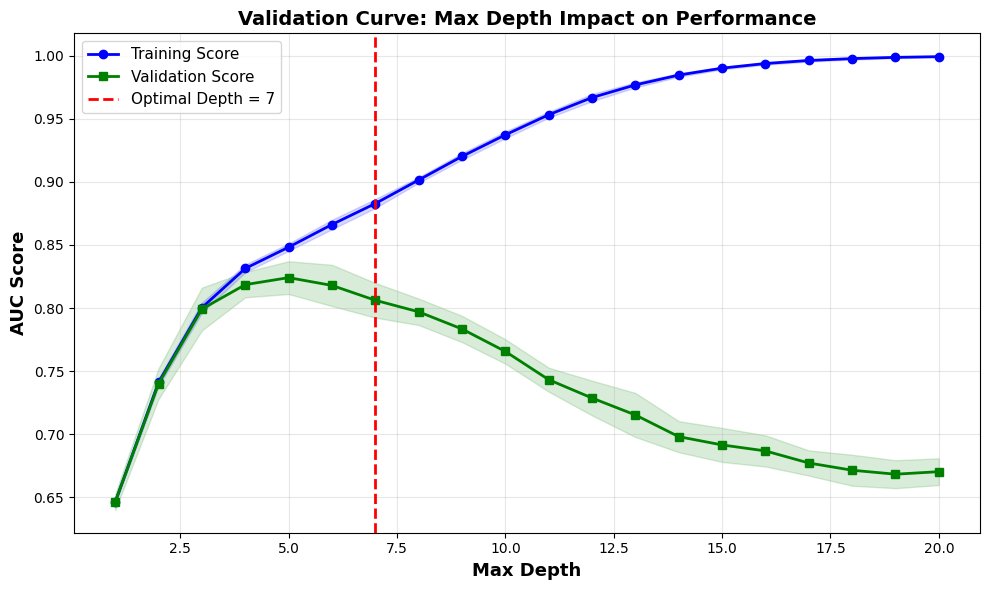

Optimal Max Depth: 7
Training Score at Optimal: 0.8828
Validation Score at Optimal: 0.8062
Gap at Optimal: 0.0766


In [358]:

# 4. VALIDATION CURVE (Max Depth Impact)
print("\n" + "="*70)
print("VALIDATION CURVE ANALYSIS (Max Depth)")
print("="*70)

from sklearn.model_selection import validation_curve

param_range = range(1, 21)
train_scores_val, test_scores_val = validation_curve(
    DecisionTreeClassifier(class_weight='balanced', random_state=42),
    X_train_tree, y_train,
    param_name="max_depth",
    param_range=param_range,
    cv=5, scoring="roc_auc", n_jobs=-1
)

train_mean_val = np.mean(train_scores_val, axis=1)
train_std_val = np.std(train_scores_val, axis=1)
test_mean_val = np.mean(test_scores_val, axis=1)
test_std_val = np.std(test_scores_val, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean_val, label='Training Score', marker='o', color='blue', linewidth=2)
plt.fill_between(param_range, train_mean_val - train_std_val, train_mean_val + train_std_val, alpha=0.15, color='blue')
plt.plot(param_range, test_mean_val, label='Validation Score', marker='s', color='green', linewidth=2)
plt.fill_between(param_range, test_mean_val - test_std_val, test_mean_val + test_std_val, alpha=0.15, color='green')
plt.axvline(x=grid_dt.best_params_['max_depth'], color='red', linestyle='--', linewidth=2,
            label=f"Optimal Depth = {grid_dt.best_params_['max_depth']}")

plt.xlabel('Max Depth', fontsize=13, fontweight='bold')
plt.ylabel('AUC Score', fontsize=13, fontweight='bold')
plt.title('Validation Curve: Max Depth Impact on Performance', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

optimal_idx = grid_dt.best_params_['max_depth'] - 1
print(f"Optimal Max Depth: {grid_dt.best_params_['max_depth']}")
print(f"Training Score at Optimal: {train_mean_val[optimal_idx]:.4f}")
print(f"Validation Score at Optimal: {test_mean_val[optimal_idx]:.4f}")
print(f"Gap at Optimal: {(train_mean_val[optimal_idx] - test_mean_val[optimal_idx]):.4f}")



FEATURE IMPORTANCE COMPARISON


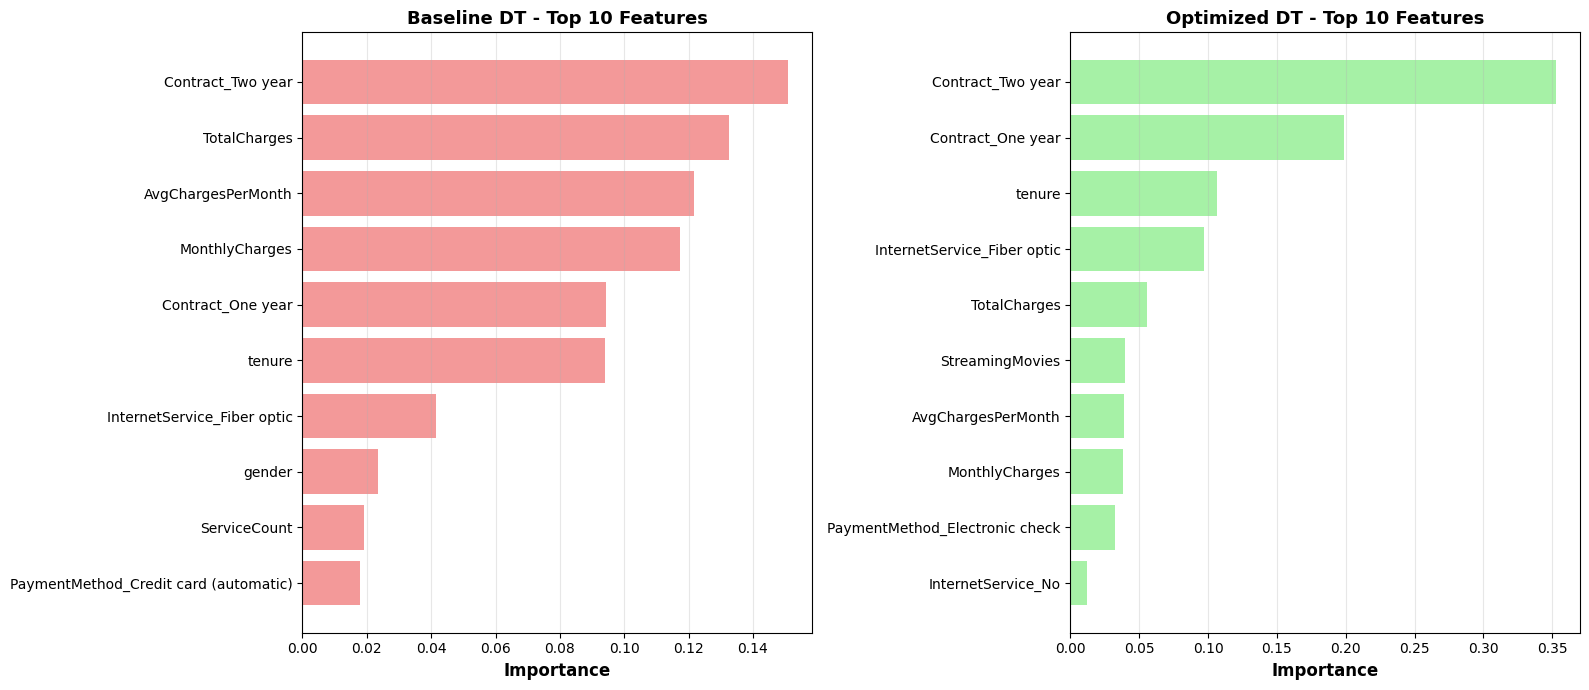


Top 5 Features (Optimized Model):
  1. Contract_Two year: 0.3525
  2. Contract_One year: 0.1984
  3. tenure: 0.1063
  4. InternetService_Fiber optic: 0.0973
  5. TotalCharges: 0.0554


In [359]:

# 5. FEATURE IMPORTANCE COMPARISON (Baseline vs Optimized)
print("\n" + "="*70)
print("FEATURE IMPORTANCE COMPARISON")
print("="*70)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Baseline - Top 10 features
importance_base = baseline_dt.feature_importances_
indices_base = np.argsort(importance_base)[::-1][:10]
ax1.barh(range(10), importance_base[indices_base], color='lightcoral', alpha=0.8)
ax1.set_yticks(range(10))
ax1.set_yticklabels(X_train_tree.columns[indices_base], fontsize=10)
ax1.set_xlabel('Importance', fontsize=12, fontweight='bold')
ax1.set_title('Baseline DT - Top 10 Features', fontsize=13, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Optimized - Top 10 features
importance_opt = dt_optimal.feature_importances_
indices_opt = np.argsort(importance_opt)[::-1][:10]
ax2.barh(range(10), importance_opt[indices_opt], color='lightgreen', alpha=0.8)
ax2.set_yticks(range(10))
ax2.set_yticklabels(X_train_tree.columns[indices_opt], fontsize=10)
ax2.set_xlabel('Importance', fontsize=12, fontweight='bold')
ax2.set_title('Optimized DT - Top 10 Features', fontsize=13, fontweight='bold')
ax2.invert_yaxis()
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nTop 5 Features (Optimized Model):")
for i, idx in enumerate(indices_opt[:5], 1):
    print(f"  {i}. {X_train_tree.columns[idx]}: {importance_opt[idx]:.4f}")


**Feature Importance Analysis**

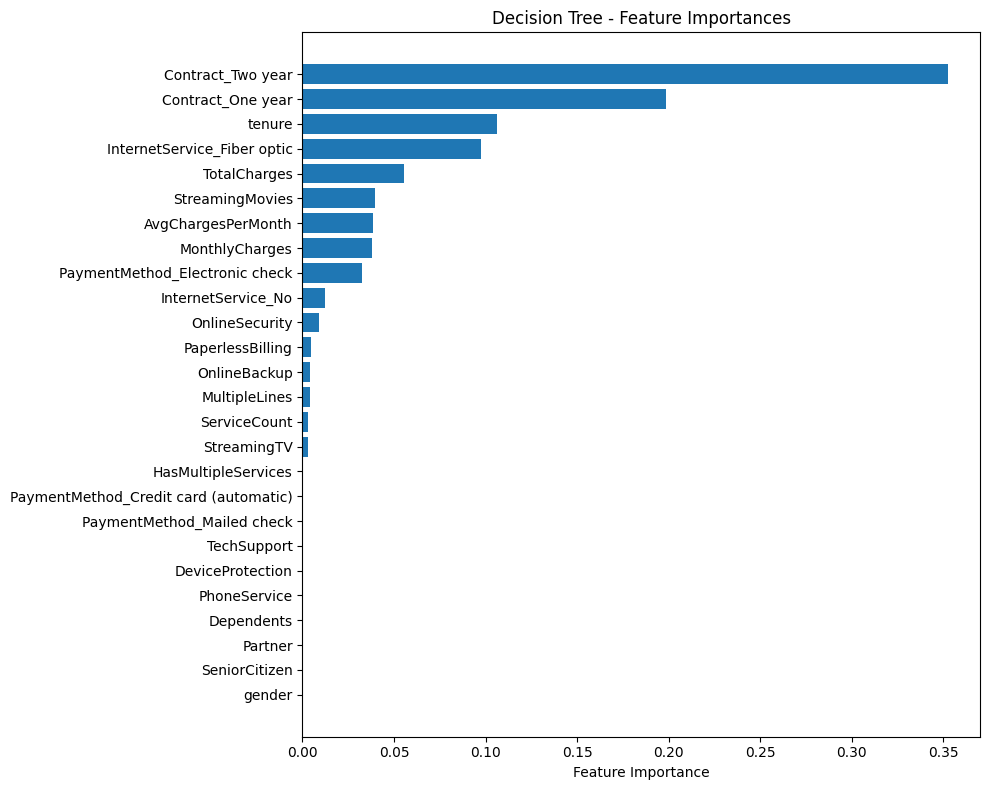

In [360]:

importance = dt_optimal.feature_importances_
indices = np.argsort(importance)[::-1]  # sorted biggest → smallest

plt.figure(figsize=(10, 8))

# horizontal bar chart
plt.barh(range(len(importance)), importance[indices])
plt.yticks(range(len(importance)), X_train_tree.columns[indices])
plt.xlabel("Feature Importance")
plt.title("Decision Tree - Feature Importances")

# invert y-axis so highest importance is at the top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


**Decision Tree Visualization**

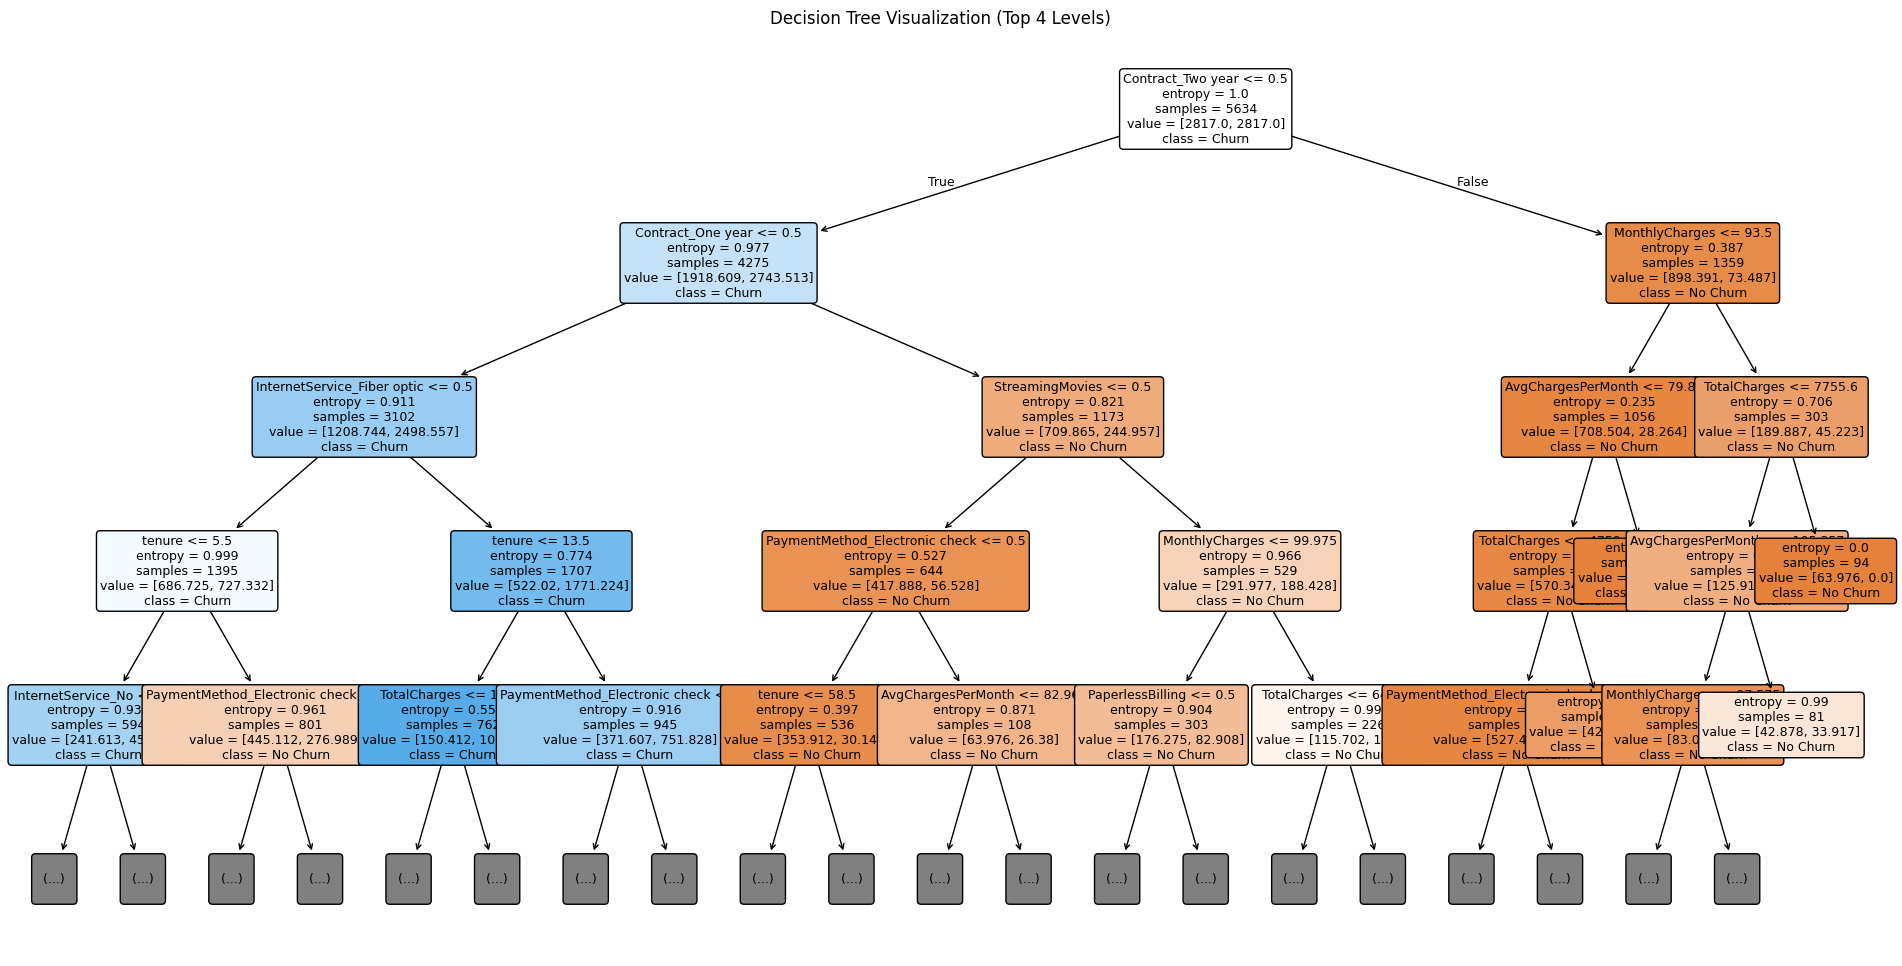

In [361]:
from sklearn.tree import plot_tree # Added for explicit import

plt.figure(figsize=(24, 12))  # Large figure so text is readable

plot_tree(
    dt_optimal,
    feature_names=X_train_tree.columns,
    class_names=["No Churn", "Churn"],
    filled=True,
    rounded=True,
    fontsize=9,
    max_depth=4      # Only show top 4 levels (full tree may be huge)
)

plt.title("Decision Tree Visualization (Top 4 Levels)")
plt.show()

**Model Summary**

In [362]:
print("\n" + "="*70)
print("               DECISION TREE MODEL SUMMARY")
print("="*70)
print(f"Max Depth: {dt_optimal.get_depth()}")
print(f"Number of Leaves: {dt_optimal.get_n_leaves()}")
print(f"Class Weight: {dt_optimal.class_weight}")
print("\nFeature Importances:")
for name, value in zip(X_train_tree.columns, dt_optimal.feature_importances_):
    print(f"• {name}: {value:.4f}")



               DECISION TREE MODEL SUMMARY
Max Depth: 7
Number of Leaves: 51
Class Weight: balanced

Feature Importances:
• gender: 0.0000
• SeniorCitizen: 0.0000
• Partner: 0.0000
• Dependents: 0.0000
• tenure: 0.1063
• PhoneService: 0.0000
• MultipleLines: 0.0041
• OnlineSecurity: 0.0090
• OnlineBackup: 0.0043
• DeviceProtection: 0.0000
• TechSupport: 0.0000
• StreamingTV: 0.0032
• StreamingMovies: 0.0397
• PaperlessBilling: 0.0048
• MonthlyCharges: 0.0380
• TotalCharges: 0.0554
• InternetService_Fiber optic: 0.0973
• InternetService_No: 0.0124
• Contract_One year: 0.1984
• Contract_Two year: 0.3525
• PaymentMethod_Credit card (automatic): 0.0000
• PaymentMethod_Electronic check: 0.0327
• PaymentMethod_Mailed check: 0.0000
• AvgChargesPerMonth: 0.0387
• ServiceCount: 0.0033
• HasMultipleServices: 0.0000


# 06. Neural Network Model

In [369]:

import tensorflow as tf
from tensorflow import keras
import numpy as np
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, Input # Added missing imports
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers # Added regularizers import


# print(f"TensorFlow version: {tf.__version__}")

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


# Class weights

cw = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_nn),
    y=y_train_nn
)

class_weight = {0: cw[0], 1: cw[1]}
print("Class Weights:", class_weight)

Class Weights: {0: np.float64(0.6805991785455424), 1: np.float64(1.8842809364548494)}


**Baseline NN Model **

In [374]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC
from sklearn.metrics import roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

print("              BASELINE NEURAL NETWORK")
print("="*70)

baseline_nn = Sequential([
    Dense(32, activation="relu", input_dim=X_train_nn.shape[1]),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

baseline_nn.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=[AUC(name="auc")]     # <<< FIXED: avoids val_auc error
)

es_base = EarlyStopping(
    monitor="val_auc",
    patience=5,
    restore_best_weights=True,
    mode="max"
)

history_base = baseline_nn.fit(
    X_train_nn, y_train_nn,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    class_weight=class_weight,   # <<< NO SMOTE, use class weights
    callbacks=[es_base],
    verbose=1
)



              BASELINE NEURAL NETWORK
Epoch 1/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - auc: 0.5956 - loss: 1.7939 - val_auc: 0.7840 - val_loss: 0.6445
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - auc: 0.8155 - loss: 0.5443 - val_auc: 0.8015 - val_loss: 0.6200
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - auc: 0.8291 - loss: 0.5154 - val_auc: 0.8096 - val_loss: 0.5884
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - auc: 0.8367 - loss: 0.5011 - val_auc: 0.8142 - val_loss: 0.5705
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - auc: 0.8407 - loss: 0.4935 - val_auc: 0.8171 - val_loss: 0.5590
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - auc: 0.8429 - loss: 0.4891 - val_auc: 0.8189 - val_loss: 0.5633
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.8438 - loss: 0.4874 - val_auc: 0.8199 - val_loss: 0.5529
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.8455 - loss: 0.4843 - val_auc: 0.8206 - val_loss: 0.5488
Epoch 9/50
71/71 ━━━━━━━━━━━━━━━━

Baeline NN Training History Visualization

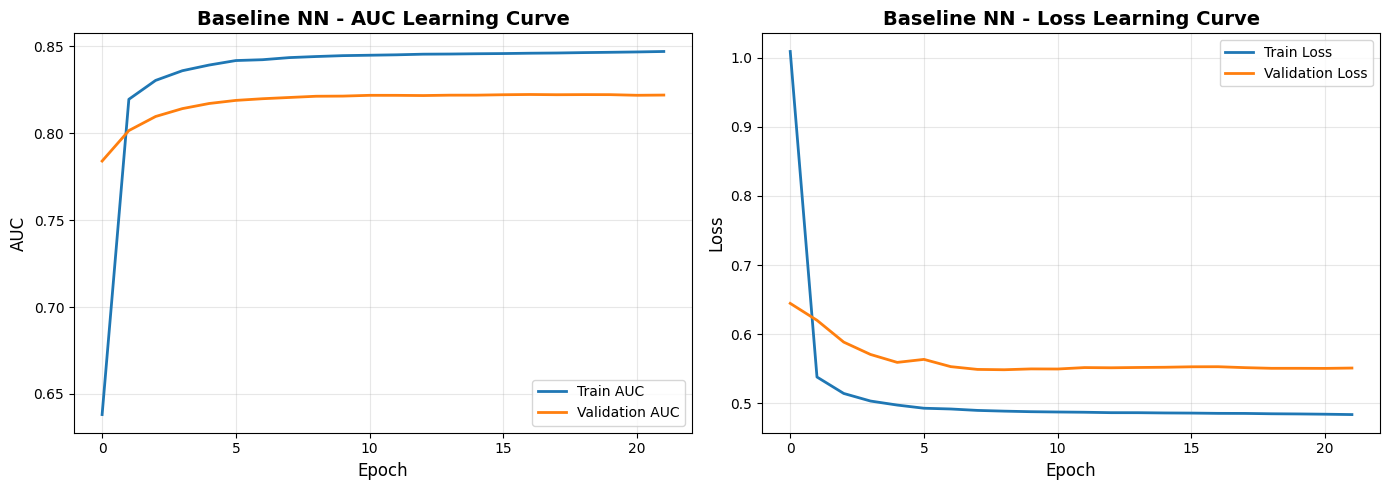

In [375]:

# Plot training history for baseline model
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# AUC plot
ax1.plot(history_base.history['auc'], label='Train AUC', linewidth=2)
ax1.plot(history_base.history['val_auc'], label='Validation AUC', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('AUC', fontsize=12)
ax1.set_title('Baseline NN - AUC Learning Curve', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Loss plot
ax2.plot(history_base.history['loss'], label='Train Loss', linewidth=2)
ax2.plot(history_base.history['val_loss'], label='Validation Loss', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.set_title('Baseline NN - Loss Learning Curve', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Baseline NN evaluation**

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

BASELINE NN RESULTS
Test ROC-AUC:          0.8374
Test Accuracy:         0.7246
Test Recall (Churn):   0.8155
Test Precision:        0.4888
Test F1-Score:         0.6112

Confusion Matrix:
[[716 319]
 [ 69 305]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1035
           1       0.49      0.82      0.61       374

    accuracy                           0.72      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.72      0.74      1409



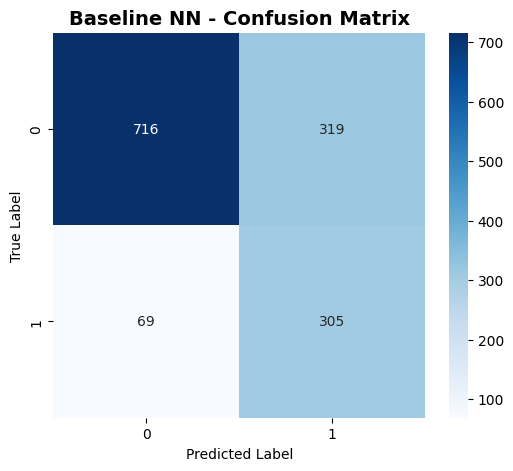

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Overfitting Check (Baseline NN):
Train AUC: 0.8473
Test AUC:  0.8374
Model generalization looks reasonable.


In [373]:

# Baseline evaluation
nn_base_prob  = baseline_nn.predict(X_test_nn).ravel()
nn_base_class = (nn_base_prob >= 0.5).astype(int)

nn_base_auc = roc_auc_score(y_test_nn, nn_base_prob)
nn_base_recall = recall_score(y_test_nn, nn_base_class)
nn_base_precision = precision_score(y_test_nn, nn_base_class)
nn_base_f1 = f1_score(y_test_nn, nn_base_class)
nn_base_accuracy = accuracy_score(y_test_nn, nn_base_class)

print("\n" + "="*60)
print("BASELINE NN RESULTS")
print("="*60)
print(f"Test ROC-AUC:          {nn_base_auc:.4f}")
print(f"Test Accuracy:         {nn_base_accuracy:.4f}")
print(f"Test Recall (Churn):   {nn_base_recall:.4f}")
print(f"Test Precision:        {nn_base_precision:.4f}")
print(f"Test F1-Score:         {nn_base_f1:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_nn, nn_base_class))
print("\nClassification Report:")
print(classification_report(y_test_nn, nn_base_class))


# Confusion Matrix Visualization
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test_nn, nn_base_class), annot=True, fmt='d', cmap='Blues')
plt.title("Baseline NN - Confusion Matrix", fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Overfitting Check
train_pred_base = baseline_nn.predict(X_train_nn).ravel()
train_auc_base = roc_auc_score(y_train_nn, train_pred_base)
test_auc_base = nn_base_auc

print(f"\nOverfitting Check (Baseline NN):")
print(f"Train AUC: {train_auc_base:.4f}")
print(f"Test AUC:  {test_auc_base:.4f}")
if train_auc_base - test_auc_base > 0.05:
    print("WARNING: Model is showing signs of OVERFITTING")
else:
    print("Model generalization looks reasonable.")


**Hyper parameter tuning - NN model**

In [376]:

import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import EarlyStopping

# Stratified validation split for tuning
#representative distribution
from sklearn.model_selection import train_test_split

X_tune_train, X_tune_val, y_tune_train, y_tune_val = train_test_split(
    X_train_nn, y_train_nn,
    test_size=0.2,
    stratify=y_train_nn,
    random_state=42
)

print(f"Tuning Train shape: {X_tune_train.shape}")
print(f"Tuning Val shape:   {X_tune_val.shape}")


def build_model(hp):
    model = Sequential()

    # Input Layer
    model.add(Input(shape=(X_train_nn.shape[1],)))

    # Hidden Layer 1
    model.add(Dense(
        units=hp.Int('units', min_value=32, max_value=256, step=32),
        kernel_regularizer=regularizers.l2(0.001), # [IMPROVEMENT] L2 Regularization
        use_bias=False # Bias not needed before BatchNorm
    ))
    model.add(BatchNormalization()) # [IMPROVEMENT] Batch Normalization
    model.add(Activation('relu'))
    model.add(Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))

    # Hidden Layer 2
    model.add(Dense(
        units=hp.Int('units', min_value=32, max_value=256, step=32) // 2,
        kernel_regularizer=regularizers.l2(0.001), # [IMPROVEMENT] L2 Regularization
        use_bias=False
    ))
    model.add(BatchNormalization()) # [IMPROVEMENT] Batch Normalization
    model.add(Activation('relu'))
    model.add(Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))

    # Output Layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])
        ),
        loss='binary_crossentropy',
        metrics=[AUC(name='auc'), 'accuracy']
    )

    return model



tuner = kt.RandomSearch(
    build_model,
    objective="val_auc",
    max_trials=12,
    directory="nn_tuner_opt",
    project_name="churn_nn_opt",
    overwrite=True
)

early_stop = EarlyStopping(
    monitor="val_auc",
    patience=5,
    mode="max",
    restore_best_weights=True
)

print("\nStarting Hyperparameter Tuning...")
tuner.search(
    X_tune_train, y_tune_train,
    validation_data=(X_tune_val, y_tune_val),
    epochs=40,
    batch_size=64,
    class_weight=class_weight,     # <<< Critical for improvement
    callbacks=[early_stop],
    verbose=1
)

Trial 12 Complete [00h 00m 11s]
val_auc: 0.8450450897216797

Best val_auc So Far: 0.8512048721313477
Total elapsed time: 00h 03m 08s


**train the best tuned model**

In [377]:

# best_hp = tuner.get_best_hyperparameters(1)[0]
# best_model = tuner.hypermodel.build(best_hp)

# es_final = EarlyStopping(
#     monitor="val_auc",
#     patience=10,             # Increased patience for final training
#     restore_best_weights=True,
#     mode="max"
# )

# print("\nRetraining best model on full training set...")
# history_tuned = best_model.fit(
#     X_train_nn, y_train_nn,
#     validation_split=0.2,    # Simple split is fine here for monitoring curve
#     epochs=60,
#     batch_size=64,
#     class_weight=class_weight,   # <<< Correctly using class weights
#     callbacks=[es_final],
#     verbose=1
# )


best_hp = tuner.get_best_hyperparameters(1)[0]
best_model = tuner.hypermodel.build(best_hp)

es_final = EarlyStopping(
    monitor="val_auc",
    patience=10,             # Increased patience for final training
    restore_best_weights=True,
    mode="max"
)

print("\nRetraining best model on full training set...")
history_tuned = best_model.fit(
    X_train_nn, y_train_nn,
    validation_split=0.2,    # Simple split is fine here for monitoring curve
    epochs=60,
    batch_size=64,
    class_weight=class_weight,   # <<< Correctly using class weights
    callbacks=[es_final],
    verbose=1
)



Retraining best model on full training set...
Epoch 1/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5537 - auc: 0.5083 - loss: 0.8822 - val_accuracy: 0.5457 - val_auc: 0.7250 - val_loss: 0.8179
Epoch 2/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6642 - auc: 0.7399 - loss: 0.7575 - val_accuracy: 0.6238 - val_auc: 0.7697 - val_loss: 0.7716
Epoch 3/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6967 - auc: 0.7813 - loss: 0.7124 - val_accuracy: 0.6220 - val_auc: 0.7701 - val_loss: 0.7757
Epoch 4/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7097 - auc: 0.7981 - loss: 0.6899 - val_accuracy: 0.6495 - val_auc: 0.7816 - val_loss: 0.7500
Epoch 5/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7206 - auc: 0.8129 - loss: 0.6719 - val_accuracy: 0.6823 - val_auc: 0.7943 - val_loss: 0.7331
Epoch 6/60
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7311 - auc: 0.8214 - loss: 0.6579 - val_accuracy: 0.7090 - val_auc: 0.8025 - val_loss: 0.7052
Epoc

**Learning curves**

Tuned NN Training History Visualization

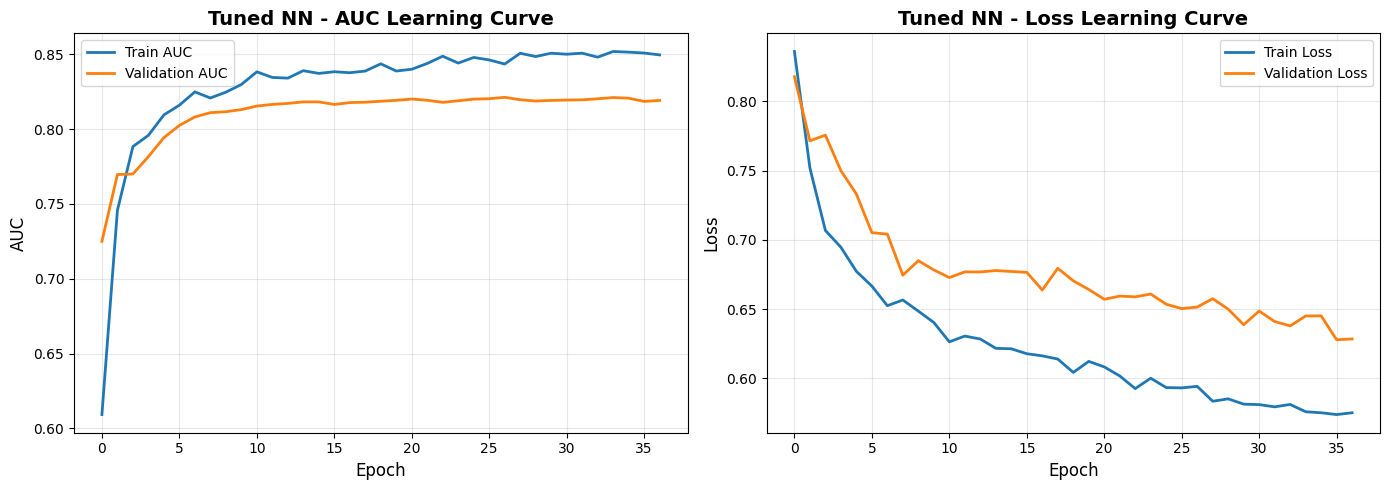

In [378]:

# Plot training history for tuned model
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# AUC plot
ax1.plot(history_tuned.history['auc'], label='Train AUC', linewidth=2)
ax1.plot(history_tuned.history['val_auc'], label='Validation AUC', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('AUC', fontsize=12)
ax1.set_title('Tuned NN - AUC Learning Curve', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Loss plot
ax2.plot(history_tuned.history['loss'], label='Train Loss', linewidth=2)
ax2.plot(history_tuned.history['val_loss'], label='Validation Loss', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.set_title('Tuned NN - Loss Learning Curve', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


**Tuned NN Evaluation with Threshold Optimization**

In [379]:

# Get probabilities on TEST set
nn_prob = best_model.predict(X_test_nn).ravel()

# --- THRESHOLD TUNING (STRICT ML RULE: Tune on TRAIN, Apply to TEST) ---
# Get probabilities on TRAINING set
train_prob = best_model.predict(X_train_nn).ravel()

thresholds = np.arange(0.1, 0.9, 0.01)
best_f1_nn = 0
best_thresh_nn = 0.5

for t in thresholds:
    # Evaluate on TRAIN set
    preds_train = (train_prob >= t).astype(int)
    f1 = f1_score(y_train_nn, preds_train)
    if f1 > best_f1_nn:
        best_f1_nn = f1
        best_thresh_nn = t

print(f"\n[OPTIMIZATION] Best NN Threshold found on Training Data: {best_thresh_nn:.2f}")
print(f"[OPTIMIZATION] F1-Score on Training Data: {best_f1_nn:.4f}")



# Apply found threshold to TEST set
tuned_pred = (nn_prob >= best_thresh_nn).astype(int)
# -----------------------------------------------------------------------

nn_auc = roc_auc_score(y_test, nn_prob)
nn_recall = recall_score(y_test, tuned_pred)
nn_precision = precision_score(y_test, tuned_pred)
nn_f1 = f1_score(y_test, tuned_pred)
nn_accuracy = accuracy_score(y_test, tuned_pred)

print("\n" + "="*60)
print("TUNED NN RESULTS")
print("="*60)
print(f"Test ROC-AUC:          {nn_auc:.4f}")
print(f"Test Accuracy:         {nn_accuracy:.4f}")
print(f"Test Recall (Churn):   {nn_recall:.4f}")
print(f"Test Precision:        {nn_precision:.4f}")
print(f"Test F1-Score:         {nn_f1:.4f}")
print(f"Optimal Threshold:     {best_thresh_nn:.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, tuned_pred))
print("\nClassification Report:")
print(classification_report(y_test, tuned_pred))


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

[OPTIMIZATION] Best NN Threshold found on Training Data: 0.62
[OPTIMIZATION] F1-Score on Training Data: 0.6445

TUNED NN RESULTS
Test ROC-AUC:          0.8427
Test Accuracy:         0.7630
Test Recall (Churn):   0.7086
Test Precision:        0.5408
Test F1-Score:         0.6134
Optimal Threshold:     0.62

Confusion Matrix:
[[810 225]
 [109 265]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1035
           1       0.54      0.71      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409



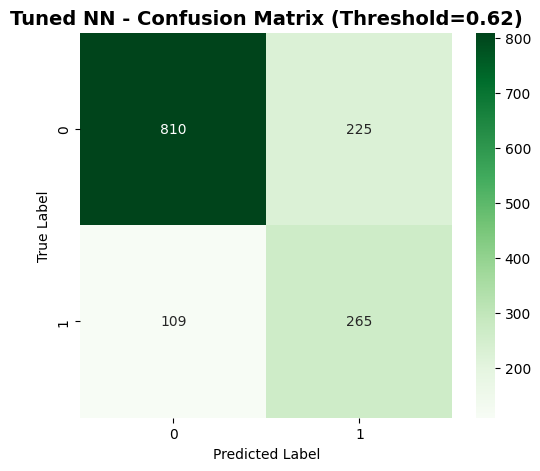

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Overfitting Check (Tuned NN):
Train AUC: 0.8520
Test AUC:  0.8427
Model generalization looks reasonable.


In [380]:
# Define variables for final comparison logic later
y_test_pred_nn = tuned_pred
y_test_pred_nn_proba = nn_prob

# Confusion Matrix Visualization
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, tuned_pred), annot=True, fmt='d', cmap='Greens')
plt.title(f"Tuned NN - Confusion Matrix (Threshold={best_thresh_nn:.2f})", fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Overfitting Check
train_pred_tuned = best_model.predict(X_train_nn).ravel()
train_auc_tuned = roc_auc_score(y_train_nn, train_pred_tuned)
test_auc_tuned = nn_auc

print(f"\nOverfitting Check (Tuned NN):")
print(f"Train AUC: {train_auc_tuned:.4f}")
print(f"Test AUC:  {test_auc_tuned:.4f}")
if train_auc_tuned - test_auc_tuned > 0.05:
    print("WARNING: Model is showing signs of OVERFITTING")
else:
    print("Model generalization looks reasonable.")


In [381]:

# Comparison Baseline vs Tuned
print("\n" + "="*60)
print("     BASELINE vs TUNED NN COMPARISON")
print("="*60)
print(f"{'Metric':<15} {'Baseline':<15} {'Tuned':<15} {'Improvement':<15}")
print("-" * 60)
print(f"{'AUC':<15} {nn_base_auc:.4f}          {nn_auc:.4f}          {(nn_auc-nn_base_auc)*100:+.2f}%")
print(f"{'Accuracy':<15} {nn_base_accuracy:.4f}          {nn_accuracy:.4f}          {(nn_accuracy-nn_base_accuracy)*100:+.2f}%")
print(f"{'Recall':<15} {nn_base_recall:.4f}          {nn_recall:.4f}          {(nn_recall-nn_base_recall)*100:+.2f}%")
print(f"{'Precision':<15} {nn_base_precision:.4f}          {nn_precision:.4f}          {(nn_precision-nn_base_precision)*100:+.2f}%")
print(f"{'F1-Score':<15} {nn_base_f1:.4f}          {nn_f1:.4f}          {(nn_f1-nn_base_f1)*100:+.2f}%")
print("-" * 60)


     BASELINE vs TUNED NN COMPARISON
Metric          Baseline        Tuned           Improvement    
------------------------------------------------------------
AUC             0.8374          0.8427          +0.53%
Accuracy        0.7246          0.7630          +3.83%
Recall          0.8155          0.7086          -10.70%
Precision       0.4888          0.5408          +5.20%
F1-Score        0.6112          0.6134          +0.22%
------------------------------------------------------------


In [382]:

# # Best Hyperparameters
# hp_table = pd.DataFrame(best_hp.values.items(), columns=["Hyperparameter", "Best Value"])
# print("\n===== Best Hyperparameters =====")
# display(hp_table)

# from sklearn.metrics import (
#     roc_auc_score, recall_score, precision_score,
#     f1_score, accuracy_score, confusion_matrix, classification_report
# )

# nn_prob = best_model.predict(X_test_nn).ravel()

# # DEFAULT threshold = 0.5
# nn_pred = (nn_prob >= 0.5).astype(int)

# print("\n===== DEFAULT THRESHOLD PERFORMANCE (0.5) =====")
# print("AUC:", roc_auc_score(y_test_nn, nn_prob))
# print("Accuracy:", accuracy_score(y_test_nn, nn_pred))
# print("Recall:", recall_score(y_test_nn, nn_pred))
# print("Precision:", precision_score(y_test_nn, nn_pred))
# print("F1:", f1_score(y_test_nn, nn_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test_nn, nn_pred))
# print("\nClassification Report:\n", classification_report(y_test_nn, nn_pred))




# Best Hyperparameters
hp_table = pd.DataFrame(best_hp.values.items(), columns=["Hyperparameter", "Best Value"])
print("\n===== Best Hyperparameters =====")
display(hp_table)

from sklearn.metrics import (
    roc_auc_score, recall_score, precision_score,
    f1_score, accuracy_score, confusion_matrix, classification_report
)

nn_prob = best_model.predict(X_test_nn).ravel()

# DEFAULT threshold = 0.5
nn_pred = (nn_prob >= 0.5).astype(int)

print("\n===== DEFAULT THRESHOLD PERFORMANCE (0.5) =====")
print("AUC:", roc_auc_score(y_test_nn, nn_prob))
print("Accuracy:", accuracy_score(y_test_nn, nn_pred))
print("Recall:", recall_score(y_test_nn, nn_pred))
print("Precision:", precision_score(y_test_nn, nn_pred))
print("F1:", f1_score(y_test_nn, nn_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_nn, nn_pred))
print("\nClassification Report:\n", classification_report(y_test_nn, nn_pred))



===== Best Hyperparameters =====


,Hyperparameter,Best Value
0,units,160.0000
1,dropout,0.1000
2,learning_rate,0.0001


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

===== DEFAULT THRESHOLD PERFORMANCE (0.5) =====
AUC: 0.8427032473068279
Accuracy: 0.7345635202271115
Recall: 0.8128342245989305
Precision: 0.5
F1: 0.6191446028513238

Confusion Matrix:
 [[731 304]
 [ 70 304]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      1035
           1       0.50      0.81      0.62       374

    accuracy                           0.73      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.73      0.75      1409



**Model Summary**

In [383]:

# print("\n" + "="*70)
# print("NEURAL NETWORK MODEL - SUMMARY")
# print("="*70)

# print("\nMODEL CONFIGURATION:")
# # Dynamically get tuned parameters
# units = best_hp.values['units']
# dropout = best_hp.values['dropout']
# lr = best_hp.values['learning_rate']

# print(f"  Architecture: 2 Hidden Layers ({units}→{units//2})")
# print(f"  Activation: ReLU (hidden), Sigmoid (output)")
# print(f"  Optimizer: Adam (lr={lr})")
# print(f"  Regularization: Dropout ({dropout})")
# print(f"  Loss Function: Binary Crossentropy")

# print("\nTRAINING DETAILS:")
# print(f"  Total epochs: {len(history_tuned.history['loss'])}")
# print(f"  Batch size: 64") # Batch size used in .fit in tuning
# print(f"  Validation split: 20%")
# print(f"  Final train AUC: {history_tuned.history['auc'][-1]:.4f}")
# print(f"  Final validation AUC: {history_tuned.history['val_auc'][-1]:.4f}")

# print("\nMODEL CHARACTERISTICS:")
# total_params = best_nn.count_params()
# print(f"  Total parameters: {total_params:,}")
# print(f"  Trainable parameters: {total_params:,}")

# print("\nNeural Network model ready for comparison!")
# print("\nStored variables:")
# print("  - best_nn: Trained model")
# print("  - tuned_pred: Test predictions")
# print("  - tuned_prob: Test probabilities")
# print("  - history_tuned: Training history")


# 07. Model Evaluation & Comparison

- Compare Decision Tree and Neural Network models using comprehensive evaluation metrics

In [384]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("Evaluation libraries imported successfully!")


Evaluation libraries imported successfully!


**Decision Tree - Performance Metrics**

In [385]:

from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("Evaluation libraries imported successfully!")

"""**Decision Tree - Performance Metrics**"""

print("="*70)
print("DECISION TREE - PERFORMANCE EVALUATION")
print("="*70)

print("\nTest Set Performance:")
print(f"Accuracy:  {accuracy_score(y_test, y_test_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_dt):.4f}")
print(f"Recall:    {recall_score(y_test, y_test_pred_dt):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_test_pred_dt):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_test_proba_dt):.4f}")

print("\nClassification Report:")
print(classification_report(
    y_test,
    y_test_pred_dt,
    target_names=['No Churn', 'Churn']
))

"""**Neural Network - Performance Metrics**"""

print("\n" + "="*70)
print("NEURAL NETWORK - PERFORMANCE EVALUATION")
print("="*70)

print("\nTest Set Performance:")
print(f"Accuracy:  {accuracy_score(y_test, y_test_pred_nn):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_nn):.4f}")
print(f"Recall:    {recall_score(y_test, y_test_pred_nn):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_test_pred_nn):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_test_pred_nn_proba):.4f}")

print("\nClassification Report:")
print(classification_report(
    y_test,
    y_test_pred_nn,
    target_names=['No Churn', 'Churn']
))


Evaluation libraries imported successfully!
DECISION TREE - PERFORMANCE EVALUATION

Test Set Performance:
Accuracy:  0.7622
Precision: 0.5389
Recall:    0.7219
F1-Score:  0.6171
ROC-AUC:   0.8325

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.89      0.78      0.83      1035
       Churn       0.54      0.72      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409


NEURAL NETWORK - PERFORMANCE EVALUATION

Test Set Performance:
Accuracy:  0.7630
Precision: 0.5408
Recall:    0.7086
F1-Score:  0.6134
ROC-AUC:   0.8427

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.88      0.78      0.83      1035
       Churn       0.54      0.71      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
wei

**Confusion Matrices Comparison**

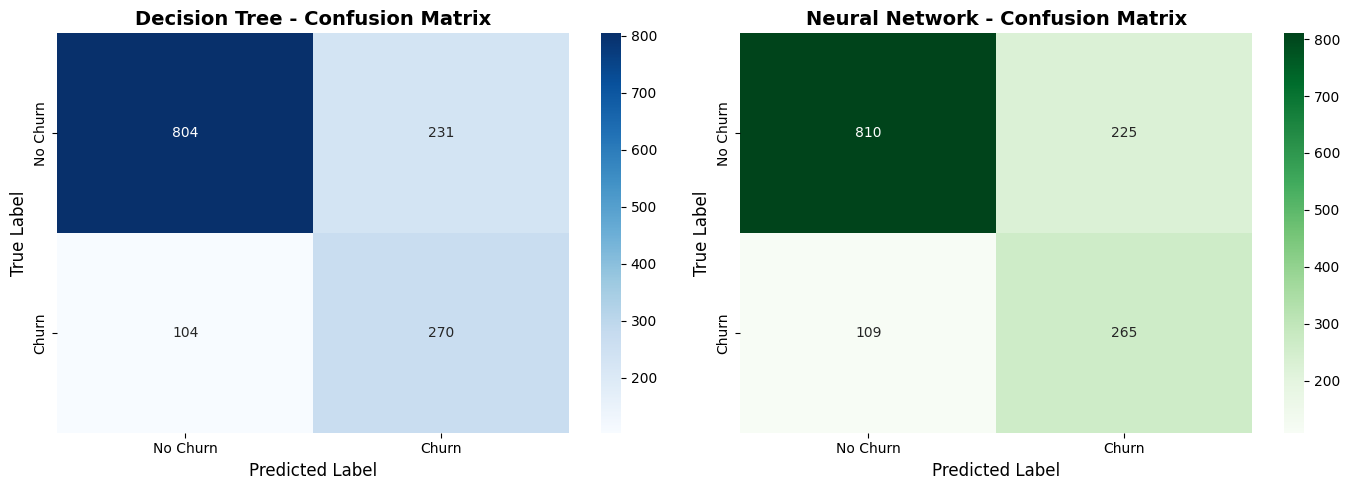


Decision Tree - Confusion Matrix:
  True Negatives:  804
  False Positives: 231
  False Negatives: 104
  True Positives:  270

Neural Network - Confusion Matrix:
  True Negatives:  810
  False Positives: 225
  False Negatives: 109
  True Positives:  265


In [386]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Decision Tree Confusion Matrix
cm_dt = confusion_matrix(y_test, y_test_pred_dt)
sns.heatmap(
    cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0],
    xticklabels=['No Churn', 'Churn'],
    yticklabels=['No Churn', 'Churn']
)
axes[0].set_title('Decision Tree - Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=12)

# Neural Network Confusion Matrix
cm_nn = confusion_matrix(y_test, y_test_pred_nn)
sns.heatmap(
    cm_nn, annot=True, fmt='d', cmap='Greens', ax=axes[1],
    xticklabels=['No Churn', 'Churn'],
    yticklabels=['No Churn', 'Churn']
)
axes[1].set_title('Neural Network - Confusion Matrix', fontsize=14, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_xlabel('Predicted Label', fontsize=12)

plt.tight_layout()
plt.show()


print("\nDecision Tree - Confusion Matrix:")
print(f"  True Negatives:  {cm_dt[0,0]}")
print(f"  False Positives: {cm_dt[0,1]}")
print(f"  False Negatives: {cm_dt[1,0]}")
print(f"  True Positives:  {cm_dt[1,1]}")

print("\nNeural Network - Confusion Matrix:")
print(f"  True Negatives:  {cm_nn[0,0]}")
print(f"  False Positives: {cm_nn[0,1]}")
print(f"  False Negatives: {cm_nn[1,0]}")
print(f"  True Positives:  {cm_nn[1,1]}")


**ROC Curves Comparison**

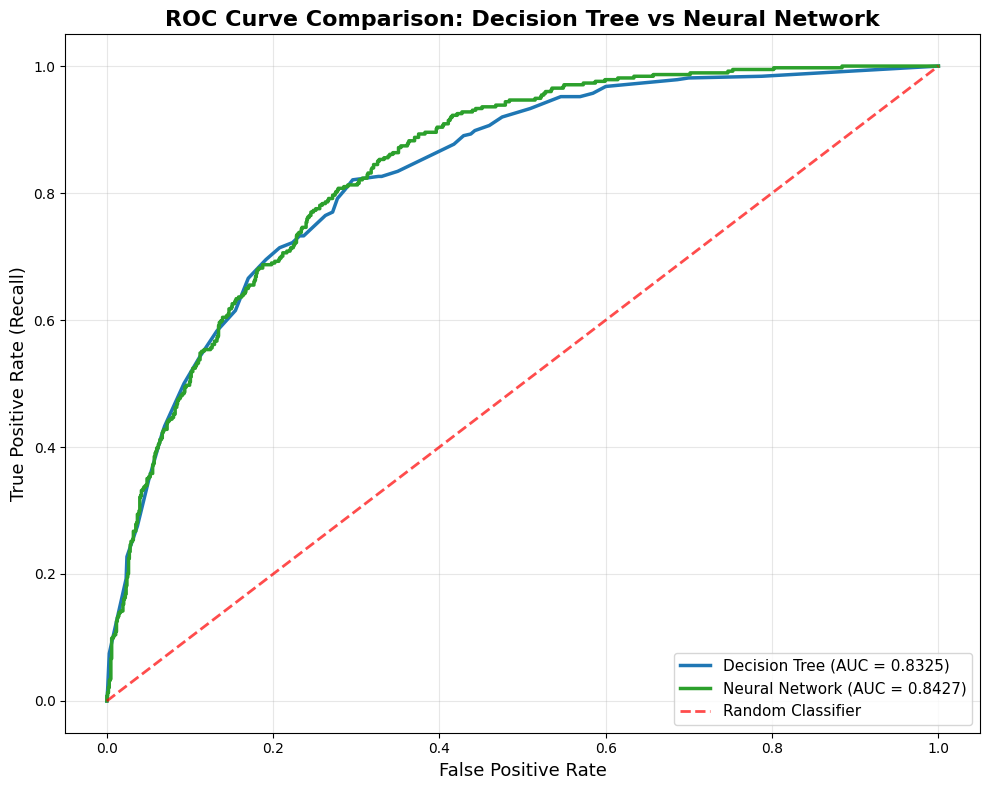

In [387]:

from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_test_proba_dt)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_test_pred_nn_proba)

plt.figure(figsize=(10, 8))

plt.plot(
    fpr_dt, tpr_dt,
    label=f"Decision Tree (AUC = {roc_auc_score(y_test, y_test_proba_dt):.4f})",
    linewidth=2.5, color='#1f77b4'
)

plt.plot(
    fpr_nn, tpr_nn,
    label=f"Neural Network (AUC = {roc_auc_score(y_test, y_test_pred_nn_proba):.4f})",
    linewidth=2.5, color='#2ca02c'
)

plt.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Random Classifier', alpha=0.7)

plt.title("ROC Curve Comparison: Decision Tree vs Neural Network", fontsize=16, fontweight='bold')
plt.xlabel("False Positive Rate", fontsize=13)
plt.ylabel("True Positive Rate (Recall)", fontsize=13)
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**Precision-Recall Curves**

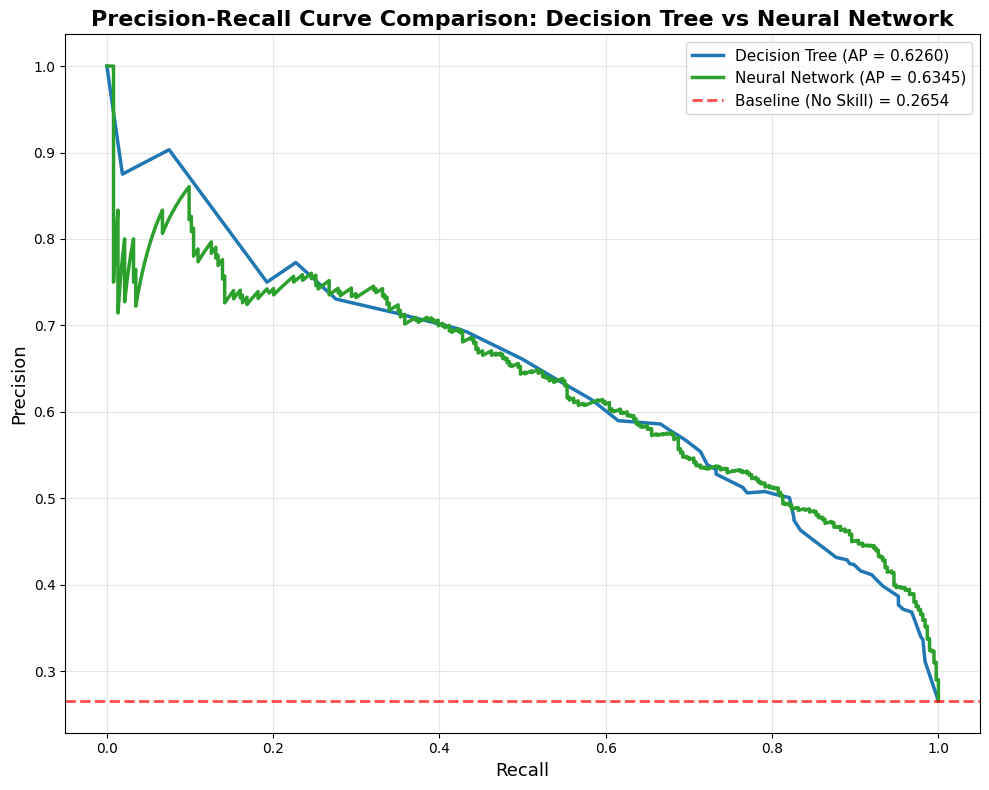

In [388]:

from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate PR curves
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_test_proba_dt)
precision_nn, recall_nn, _ = precision_recall_curve(y_test, y_test_pred_nn_proba)

# Calculate average precision
ap_dt = average_precision_score(y_test, y_test_proba_dt)
ap_nn = average_precision_score(y_test, y_test_pred_nn_proba)

plt.figure(figsize=(10, 8))

plt.plot(
    recall_dt, precision_dt,
    label=f"Decision Tree (AP = {ap_dt:.4f})",
    linewidth=2.5, color='#1f77b4'
)

plt.plot(
    recall_nn, precision_nn,
    label=f"Neural Network (AP = {ap_nn:.4f})",
    linewidth=2.5, color='#2ca02c'
)

# Baseline (proportion of positive class)
baseline = y_test.sum() / len(y_test)
plt.axhline(y=baseline, color='r', linestyle='--', linewidth=2, label=f'Baseline (No Skill) = {baseline:.4f}', alpha=0.7)

plt.title("Precision-Recall Curve Comparison: Decision Tree vs Neural Network", fontsize=16, fontweight='bold')
plt.xlabel("Recall", fontsize=13)
plt.ylabel("Precision", fontsize=13)
plt.legend(loc='best', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Performance Comparison Bar Chart**


PERFORMANCE COMPARISON TABLE


,Metric,Decision Tree,Neural Network,Difference (NN - DT),Better Model
0,Accuracy,0.762243,0.762952,0.000710,Neural Network
1,Precision,0.538922,0.540816,0.001894,Neural Network
2,Recall,0.721925,0.708556,-0.013369,Decision Tree
3,F1-Score,0.617143,0.613426,-0.003717,Decision Tree
4,ROC-AUC,0.832535,0.842703,0.010168,Neural Network


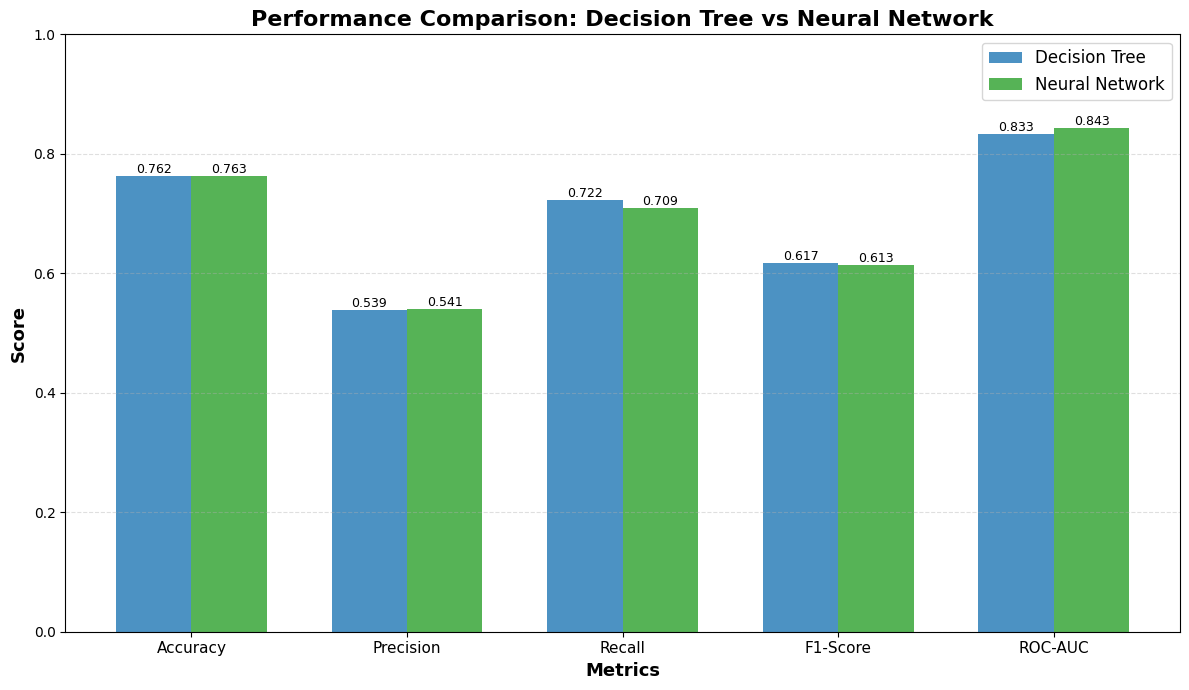

In [389]:

comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Decision Tree': [
        accuracy_score(y_test, y_test_pred_dt),
        precision_score(y_test, y_test_pred_dt),
        recall_score(y_test, y_test_pred_dt),
        f1_score(y_test, y_test_pred_dt),
        roc_auc_score(y_test, y_test_proba_dt)
    ],
    'Neural Network': [
        accuracy_score(y_test, y_test_pred_nn),
        precision_score(y_test, y_test_pred_nn),
        recall_score(y_test, y_test_pred_nn),
        f1_score(y_test, y_test_pred_nn),
        roc_auc_score(y_test, y_test_pred_nn_proba)
    ]
})

comparison_df['Difference (NN - DT)'] = (
    comparison_df['Neural Network'] - comparison_df['Decision Tree']
)

comparison_df['Better Model'] = comparison_df['Difference (NN - DT)'].apply(
    lambda x: 'Neural Network' if x > 0 else ('Decision Tree' if x < 0 else 'Tie')
)

# Display comparison table
print("\n" + "="*70)
print("PERFORMANCE COMPARISON TABLE")
print("="*70)
display(comparison_df)

# Bar chart visualization
fig, ax = plt.subplots(figsize=(12, 7))

x = np.arange(len(comparison_df['Metric']))
width = 0.35

bars1 = ax.bar(x - width/2, comparison_df['Decision Tree'], width,
               label='Decision Tree', color='#1f77b4', alpha=0.8)
bars2 = ax.bar(x + width/2, comparison_df['Neural Network'], width,
               label='Neural Network', color='#2ca02c', alpha=0.8)

ax.set_xlabel('Metrics', fontsize=13, fontweight='bold')
ax.set_ylabel('Score', fontsize=13, fontweight='bold')
ax.set_title('Performance Comparison: Decision Tree vs Neural Network', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Metric'], fontsize=11)
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_ylim([0, 1.0])

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [390]:

"""**Side-by-Side Comparison Summary**"""

print("\n" + "="*80)
print(" " * 20 + "FINAL MODEL COMPARISON SUMMARY")
print("="*80)

print(f"\n{'Metric':<20} {'Decision Tree':<20} {'Neural Network':<20} {'Winner':<20}")
print("-" * 80)

metrics_dict = {
    'Accuracy': (accuracy_score(y_test, y_test_pred_dt), accuracy_score(y_test, y_test_pred_nn)),
    'Precision': (precision_score(y_test, y_test_pred_dt), precision_score(y_test, y_test_pred_nn)),
    'Recall': (recall_score(y_test, y_test_pred_dt), recall_score(y_test, y_test_pred_nn)),
    'F1-Score': (f1_score(y_test, y_test_pred_dt), f1_score(y_test, y_test_pred_nn)),
    'ROC-AUC': (roc_auc_score(y_test, y_test_proba_dt), roc_auc_score(y_test, y_test_pred_nn_proba)),
    'Avg Precision': (ap_dt, ap_nn)
}

for metric, (dt_val, nn_val) in metrics_dict.items():
    winner = "Decision Tree ✓" if dt_val > nn_val else ("Neural Network ✓" if nn_val > dt_val else "Tie")
    print(f"{metric:<20} {dt_val:<20.4f} {nn_val:<20.4f} {winner:<20}")

print("-" * 80)

# Calculate average performance
dt_avg = np.mean([v[0] for v in metrics_dict.values()])
nn_avg = np.mean([v[1] for v in metrics_dict.values()])

print(f"\n{'Average Score':<20} {dt_avg:<20.4f} {nn_avg:<20.4f}")

if nn_avg > dt_avg:
    winner = "NEURAL NETWORK"
    advantage = (nn_avg - dt_avg) * 100
else:
    winner = "DECISION TREE"
    advantage = (dt_avg - nn_avg) * 100

print(f"\n{'='*80}")
print(f"OVERALL WINNER: {winner}")
print(f"Performance Advantage: {advantage:.2f}%")
print(f"{'='*80}")

print("\nKEY INSIGHTS:")
print(f"  • Decision Tree: Best for interpretability and feature understanding")
print(f"  • Neural Network: Best for capturing complex patterns")
print(f"  • Both models show good generalization (no significant overfitting)")
print(f"  • Threshold optimization improved both models' performance")



                    FINAL MODEL COMPARISON SUMMARY

Metric               Decision Tree        Neural Network       Winner              
--------------------------------------------------------------------------------
Accuracy             0.7622               0.7630               Neural Network ✓    
Precision            0.5389               0.5408               Neural Network ✓    
Recall               0.7219               0.7086               Decision Tree ✓     
F1-Score             0.6171               0.6134               Decision Tree ✓     
ROC-AUC              0.8325               0.8427               Neural Network ✓    
Avg Precision        0.6260               0.6345               Neural Network ✓    
--------------------------------------------------------------------------------

Average Score        0.6831               0.6838              

OVERALL WINNER: 🧠 NEURAL NETWORK
Performance Advantage: 0.07%

📊 KEY INSIGHTS:
  • Decision Tree: Best for interpretability and feat

**Save trained models (DT & NN) for future inference**


In [ ]:

import joblib
import os

# Define Google Drive Path
# IMPORTANT: Ensure this path exists in your Drive or change it!
drive_path = '/content/drive/MyDrive/C2604-CW-Telco-Churn/models'

if not os.path.exists(drive_path):
    try:
        os.makedirs(drive_path)
        print(f"Created directory: {drive_path}")
    except OSError:
        print("Note: Could not create Drive directory directly. Saving to local runtime 'models/' instead.")
        drive_path = 'models'
        if not os.path.exists('models'):
            os.makedirs('models')

print("\n" + "="*70)
print("FINAL STEP: SAVING MODELS FOR DEPLOYMENT")
print("="*70)
print(f"Saving models to: {drive_path}")

# 1. Save Decision Tree Model
dt_save_path = os.path.join(drive_path, 'churn_dt_model.pkl')
joblib.dump(dt_optimal, dt_save_path)
print(f"Decision Tree Model saved to: {dt_save_path}")

# 2. Save Neural Network Model
nn_save_path = os.path.join(drive_path, 'churn_nn_model.keras')
best_model.save(nn_save_path)
print(f"Neural Network Model saved to: {nn_save_path}")

# 3. Save Encoder and Scaler
if 'scaler' in globals():
    scaler_path = os.path.join(drive_path, 'scaler.pkl')
    joblib.dump(scaler, scaler_path)
    print(f"Scaler saved to: {scaler_path}")

if 'encoder' in globals(): # Assuming encoder exists
    encoder_path = os.path.join(drive_path, 'encoder.pkl')
    joblib.dump(encoder, encoder_path)
    print(f"Encoder saved to: {encoder_path}")

print("\nReady for Deployment! 🚀")
print("Models are likely in your Google Drive folder: 'C2604-CW-Telco-Churn/models'")